In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
import json

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_info_columns', 500)
pd.set_option('display.max_info_rows', 2000)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)

In [3]:
df = pd.read_json('scout_car.json', lines=True)
pd.set_option('display.max_columns', None)
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\n, Sicherheit:, , Deaktivierung für Beifahrer-Airbag, , ESC mit elektronischer Quersperre, , Tagfahrlicht, , Reifendruck-Kontrollanzeige, , Kopfairbag-System mit Seiten-Airbags vorn, , Sicherheitslenksäule, Assistenzsysteme:, , Berganfahrassistent, Komfort:, , Scheinwerferreinigung, , Xenon plus inklusive Scheinwerfer-Reinigungsanlage, , Scheinwerfer-Reinigungsanlage, , Einparkhilfe hinten, , Licht-/Regensensor, , Funkfernbedienung, , Elektrische Luftzusatzheizung, Interieur:...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-8-tfsi-sport-gasoline-red-b2547f8a-e83f-6237-e053-e250040a56df,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]","[\nLangstreckenfahrzeug daher die hohe Kilometerl

In [4]:
print(df.isnull().sum().sort_values(ascending=False))

kW                               15919
Last Timing Belt Service Date    15903
Electricity consumption          15782
Available from                   15647
Last Service Date                15353
Availability                     15284
Other Fuel Types                 15039
Next Inspection                  12384
Inspection new                   11987
Emission Label                   11934
Model Code                       10941
Non-smoking Vehicle               8742
Country version                   8333
Full Service                      7704
Weight                            6974
Drive chain                       6858
prev_owner                        6828
Previous Owners                   6640
Paint Type                        5772
Cylinders                         5680
Warranty                          5420
Gears                             4712
vat                               4513
Body Color Original               3759
Upholstery                        3720
Offer Number             

In [5]:
perc= df.isnull().sum()/df.shape[0]*100
perc.sort_values(ascending=False)

kW                               100.000000
Last Timing Belt Service Date     99.899491
Electricity consumption           99.139393
Available from                    98.291350
Last Service Date                 96.444500
Availability                      96.011056
Other Fuel Types                  94.472015
Next Inspection                   77.793831
Inspection new                    75.299956
Emission Label                    74.967021
Model Code                        68.729192
Non-smoking Vehicle               54.915510
Country version                   52.346253
Full Service                      48.395000
Weight                            43.809285
Drive chain                       43.080596
prev_owner                        42.892141
Previous Owners                   41.711163
Paint Type                        36.258559
Cylinders                         35.680633
Warranty                          34.047365
Gears                             29.599849
vat                             

In [6]:
df.shape

(15919, 54)

In [7]:
df.dropna(how='all', axis=1, inplace=True)
df.shape

(15919, 53)

In [8]:
df.drop(columns = ['Availability','Available from',
                   'Electricity consumption','Last Service Date',
                   'Last Timing Belt Service Date',
                   'Other Fuel Types','url'],inplace=True)



In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 46 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   make_model               object
 1   short_description        object
 2   body_type                object
 3   price                    int64 
 4   vat                      object
 5   km                       object
 6   registration             object
 7   prev_owner               object
 8   hp                       object
 9   Type                     object
 10  Previous Owners          object
 11  Next Inspection          object
 12  Inspection new           object
 13  Warranty                 object
 14  Full Service             object
 15  Non-smoking Vehicle      object
 16  null                     object
 17  Make                     object
 18  Model                    object
 19  Offer Number             object
 20  First Registration       object
 21  Body Color               object
 22

In [10]:
df.Warranty.str.contains("months").sum()/df.shape[0]

0.1292166593378981

In [11]:
drop_col_list = ["null", "short_description","Full Service","Type", 
                 "Previous Owners", "Make", "Model",
                 "Offer Number", "Emission Label", "Body Color Original", 
                 "Model Code", "Weight",
                 "description", "Country version", "First Registration", 
                 "Body","Next Inspection", "Inspection new", "Non-smoking Vehicle",
                 "Warranty", "CO2 Emission"]

In [12]:
df.drop(columns=drop_col_list, inplace= True)

In [13]:
df.shape

(15919, 25)

In [14]:
df.head(1)

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears
0,Audi A1,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,66 kW,"[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN


In [15]:
df[df.body_type.isnull() == True]["body_type"]

3175     None
3255     None
3975     None
3997     None
4206     None
4297     None
4298     None
5718     None
5938     None
5940     None
6920     None
6922     None
6927     None
7709     None
8408     None
8584     None
10837    None
10838    None
10857    None
13430    None
13470    None
13576    None
13703    None
13725    None
13852    None
13900    None
14107    None
14124    None
14127    None
14134    None
14135    None
14480    None
14869    None
14870    None
14928    None
14990    None
15058    None
15059    None
15060    None
15124    None
15269    None
15275    None
15289    None
15307    None
15378    None
15437    None
15452    None
15456    None
15457    None
15488    None
15489    None
15491    None
15499    None
15544    None
15556    None
15589    None
15696    None
15712    None
15736    None
15770    None
Name: body_type, dtype: object

In [16]:
df["body_type"].ffill(inplace=True)

In [17]:
df["body_type"].value_counts()

Sedans           7922
Station wagon    3563
Compact          3161
Van               800
Other             292
Transporter        91
Off-Road           57
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [18]:
a = df[(df["make_model"] == "Renault Espace")]["body_type"].apply(lambda x : "Van")
a.index

Int64Index([14928, 14929, 14930, 14931, 14932, 14933, 14934, 14935, 14936, 14937,
            ...
            15909, 15910, 15911, 15912, 15913, 15914, 15915, 15916, 15917, 15918], dtype='int64', length=991)

In [19]:
for i in a.index:
    df.loc[i,"body_type"] = "Van"

In [20]:
df[(df["make_model"] == "Renault Espace")]["body_type"].value_counts()

Van    991
Name: body_type, dtype: int64

In [21]:
x =0
a = []
for i in df["make_model"].unique():
    a.append(df[(df["make_model"] == i)&(df["body_type"] == "Other")]["body_type"].apply(
        lambda x : pd.DataFrame(df.groupby("make_model")["body_type"].value_counts().loc[i]).index[0]))
a

[744     Sedans
 1764    Sedans
 1793    Sedans
 1819    Sedans
 2047    Sedans
 2078    Sedans
 2104    Sedans
 2256    Sedans
 2475    Sedans
 2522    Sedans
 2526    Sedans
 2527    Sedans
 2601    Sedans
 Name: body_type, dtype: object,
 Series([], Name: body_type, dtype: object),
 2638    Sedans
 3012    Sedans
 3056    Sedans
 3222    Sedans
 3251    Sedans
 3333    Sedans
 3340    Sedans
 3647    Sedans
 3903    Sedans
 4032    Sedans
 4151    Sedans
 4310    Sedans
 4473    Sedans
 4675    Sedans
 4678    Sedans
 5383    Sedans
 Name: body_type, dtype: object,
 5812    Station wagon
 5849    Station wagon
 5882    Station wagon
 5957    Station wagon
 6069    Station wagon
             ...      
 8004    Station wagon
 8026    Station wagon
 8045    Station wagon
 8050    Station wagon
 8164    Station wagon
 Name: body_type, Length: 68, dtype: object,
 8250     Compact
 8289     Compact
 8393     Compact
 8492     Compact
 8544     Compact
           ...   
 10343    Compact
 

In [22]:
for i in range(len(a)):
    for x in a[i].index:
        df.loc[x,"body_type"] = a[i].iloc[0]

In [23]:
df[(df["make_model"] == "Audi A1")&(df["body_type"] == "Other")]["body_type"]

Series([], Name: body_type, dtype: object)

In [24]:
df.body_type.value_counts()

Sedans           7982
Station wagon    3586
Compact          3239
Van               997
Off-Road           48
Transporter        36
Coupe              23
Convertible         8
Name: body_type, dtype: int64

In [25]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [26]:
df['vat'].value_counts()

VAT deductible      10980
Price negotiable      426
Name: vat, dtype: int64

In [27]:
def vat_change(x):
    if x == 'VAT deductible' or x == 'Price negotiable':
        return True
    else:
        return False

In [28]:
df['vat']= df['vat'].apply(lambda x: vat_change(x))

In [29]:
df['vat']

0         True
1         True
2         True
3        False
4        False
         ...  
15914     True
15915     True
15916     True
15917     True
15918     True
Name: vat, Length: 15919, dtype: bool

In [30]:
df['km'][0]

'56,013 km'

In [31]:
df['km'].replace('- km', '0 km', inplace=True)

In [32]:
df['km'].value_counts()

10 km         1045
0 km          1043
1 km           367
5 km           170
50 km          148
              ... 
66,767 km        1
23,997 km        1
50,544 km        1
149,915 km       1
15,577 km        1
Name: km, Length: 6689, dtype: int64

In [33]:
a = df['km'].str.strip('km')
x= a.apply(lambda x:x.split(','))
x

0        [56, 013 ]
1        [80, 000 ]
2        [83, 450 ]
3        [73, 000 ]
4        [16, 200 ]
            ...    
15914          [0 ]
15915     [9, 900 ]
15916         [15 ]
15917         [10 ]
15918          [0 ]
Name: km, Length: 15919, dtype: object

In [34]:
z =x.apply(lambda i:''.join(i))
z

0        56013 
1        80000 
2        83450 
3        73000 
4        16200 
          ...  
15914        0 
15915     9900 
15916       15 
15917       10 
15918        0 
Name: km, Length: 15919, dtype: object

In [35]:
df['km']= pd.to_numeric(z)
df['km']

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914        0
15915     9900
15916       15
15917       10
15918        0
Name: km, Length: 15919, dtype: int64

In [36]:
df.head()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears
0,Audi A1,Sedans,15770,True,56013,01/2016,2 previous owners,66 kW,"[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN
1,Audi A1,Sedans,14500,True,80000,03/2017,None,141 kW,"[\n, Red, \n]",NaN,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n]
2,Audi A1,Sedans,14640,True,83450,02/2016,1 previous owner,85 kW,"[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)], [3.4 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Seat heating, Start-stop system]","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",NaN
3,Audi A1,Sedans,14500,False,73000,08/2016,1 previous owner,66 kW,"[\n, Brown, \n]",[\nMetallic\n],NaN,[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, Electrical side mirrors, Heads-up display, Hill Holder, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Power windows, Rain sensor, Seat heating, Split rear seats, Start-stop system]","[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB]","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with remote control, Driver drowsiness detection, Driver-side airbag, Electronic stability control, Emergency system, Hea

In [37]:
def re_chg(x):
    if x == '-/-':
        return '01/2020'
    else:
        return x

In [38]:
df['registration']= df['registration'].apply(lambda x:re_chg(x))

In [39]:
df[df['registration']== '-/-']['registration']

Series([], Name: registration, dtype: object)

In [40]:
df['registration'].head(123)

0      01/2016
1      03/2017
2      02/2016
3      08/2016
4      05/2016
        ...   
118    06/2018
119    07/2018
120    04/2018
121    09/2018
122    01/2020
Name: registration, Length: 123, dtype: object

In [41]:
a = df['registration'].str.split('/')
a

0        [01, 2016]
1        [03, 2017]
2        [02, 2016]
3        [08, 2016]
4        [05, 2016]
            ...    
15914    [01, 2020]
15915    [01, 2019]
15916    [03, 2019]
15917    [06, 2019]
15918    [01, 2019]
Name: registration, Length: 15919, dtype: object

In [42]:
newlist= []
for i in range(len(a)):
    newlist.append(int(a.iloc[i][1]))
newlist[0:5]

[2016, 2017, 2016, 2016, 2016]

In [43]:
df['year']= newlist

In [44]:
df['age']= 2020 - df['year']
df['age']

0        4
1        3
2        4
3        4
4        4
        ..
15914    0
15915    1
15916    1
15917    1
15918    1
Name: age, Length: 15919, dtype: int64

In [45]:
df.head()

,make_model,body_type,price,vat,km,registration,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,year,age
0,Audi A1,Sedans,15770,True,56013,01/2016,2 previous owners,66 kW,"[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,2016,4
1,Audi A1,Sedans,14500,True,80000,03/2017,None,141 kW,"[\n, Red, \n]",NaN,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],2017,3
2,Audi A1,Sedans,14640,True,83450,02/2016,1 previous owner,85 kW,"[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)], [3.4 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Seat heating, Start-stop system]","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",NaN,2016,4
3,Audi A1,Sedans,14500,False,73000,08/2016,1 previous owner,66 kW,"[\n, Brown, \n]",[\nMetallic\n],NaN,[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, Electrical side mirrors, Heads-up display, Hill Holder, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Power windows, Rain sensor, Seat heating, Split rear seats, Start-stop system]","[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB]","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with remote control, Driver drowsiness detection, Driver-side airbag, Electronic stability 

In [46]:
df.drop(columns = ['year', 'registration'],inplace=True)

In [47]:
df.head()

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
0,Audi A1,Sedans,15770,True,56013,2 previous owners,66 kW,"[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4
1,Audi A1,Sedans,14500,True,80000,None,141 kW,"[\n, Red, \n]",NaN,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],3
2,Audi A1,Sedans,14640,True,83450,1 previous owner,85 kW,"[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)], [3.4 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Seat heating, Start-stop system]","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",NaN,4
3,Audi A1,Sedans,14500,False,73000,1 previous owner,66 kW,"[\n, Brown, \n]",[\nMetallic\n],NaN,[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, Electrical side mirrors, Heads-up display, Hill Holder, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Power windows, Rain sensor, Seat heating, Split rear seats, Start-stop system]","[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB]","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with remote control, Driver drowsiness detection, Driver-side airbag, Electronic stability control, Emergency system, Head airbag, Immobilizer, Isofix, Pass

In [48]:
df['prev_owner'].value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [49]:
newcarindx= list(df[(df["prev_owner"].isnull())&(df["km"] <= 1000)].index)
newcarindx1= list(df[(df["prev_owner"].isnull())&(df["km"] > 1000)].index)

In [50]:
df.loc[newcarindx, "prev_owner"] =  df.loc[newcarindx, "prev_owner"].apply(lambda x :"0")
df.loc[newcarindx1, "prev_owner"] =  df.loc[newcarindx1, "prev_owner"].apply(lambda x :"1 previous owner")

In [51]:
df['prev_owner'].value_counts(dropna=False)

1 previous owner     12451
0                     2671
2 previous owners      778
3 previous owners       17
4 previous owners        2
Name: prev_owner, dtype: int64

In [52]:
df['prev_owner'].str[0]

0        2
1        1
2        1
3        1
4        1
        ..
15914    0
15915    1
15916    1
15917    0
15918    1
Name: prev_owner, Length: 15919, dtype: object

In [53]:
df['prev_owner'] = df['prev_owner'].str[0]

In [54]:
df['prev_owner'].head()

0    2
1    1
2    1
3    1
4    1
Name: prev_owner, dtype: object

In [55]:
df.head()

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
0,Audi A1,Sedans,15770,True,56013,2,66 kW,"[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4
1,Audi A1,Sedans,14500,True,80000,1,141 kW,"[\n, Red, \n]",NaN,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],3
2,Audi A1,Sedans,14640,True,83450,1,85 kW,"[\n, Black, \n]",[\nMetallic\n],"[\nCloth, Black\n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)], [3.4 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Seat heating, Start-stop system]","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",NaN,4
3,Audi A1,Sedans,14500,False,73000,1,66 kW,"[\n, Brown, \n]",[\nMetallic\n],NaN,[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, Electrical side mirrors, Heads-up display, Hill Holder, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Power windows, Rain sensor, Seat heating, Split rear seats, Start-stop system]","[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB]","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with remote control, Driver drowsiness detection, Driver-side airbag, Electronic stability control, Emergency system, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, T

In [56]:
df.hp

0         66 kW
1        141 kW
2         85 kW
3         66 kW
4         66 kW
          ...  
15914    147 kW
15915    165 kW
15916    146 kW
15917    147 kW
15918    165 kW
Name: hp, Length: 15919, dtype: object

In [57]:
df.hp = df["hp"].str.strip(" kW")

In [58]:
df.hp.value_counts(dropna=False)

85     2542
66     2122
81     1402
100    1308
110    1112
       ... 
123       1
115       1
84        1
4         1
132       1
Name: hp, Length: 81, dtype: int64

In [59]:
def fill_most(oto, group_col, col_name):
    for group in list(oto[group_col].unique()):
        grp_inx = list(oto[oto[group_col]==group][col_name].index)
        oto[col_name].iloc[grp_inx] = oto[col_name].iloc[grp_inx].fillna(oto[oto[group_col]==group][col_name].mode())

In [60]:
df[df.hp == '-'].index

Int64Index([1269, 2500, 4259, 7177, 7670, 8269, 10167, 10586, 10909, 10910, 11012, 11013, 11163, 11183, 11237, 12450, 12767, 13144, 13158, 13198, 13271, 13397, 13422, 13471, 13474, 13476, 13481, 13488, 13566, 13570, 13572, 13633, 13646, 13647, 13648, 13649, 13726, 13729, 13733, 13742, 13864, 13951, 14048, 14050, 14057, 14059, 14894, 14895, 14896, 14897, 14898, 14899, 14900, 14901, 14942, 14960, 14963, 15009, 15044, 15047, 15056, 15097, 15112, 15115, 15126, 15128, 15129, 15140, 15142, 15261, 15303, 15347, 15435, 15438, 15439, 15461, 15462, 15468, 15472, 15496, 15546, 15562, 15623, 15641, 15647, 15684, 15791, 15906], dtype='int64')

In [61]:
pd.DataFrame(df.groupby('make_model')['hp'].value_counts().loc['Audi A1'])

,hp
hp,
85,890
70,791
66,465
92,172
60,156
71,56
110,30
141,16
147,14


In [62]:
pd.DataFrame(df.groupby('make_model')['hp'].value_counts().loc['Audi A1']).index[0]

'85'

In [63]:
x =0
a = []
for i in df["make_model"].unique():
    a.append(df[(df["make_model"] == i)&(df["hp"] == "-")]["hp"].apply(
        lambda x : pd.DataFrame(df.groupby("make_model")["hp"].value_counts().loc[i]).index[0]))

In [64]:
a[0].iloc[0]

'85'

In [65]:
for i in range(len(a)):
    for x in a[i].index:
        df.loc[x,"hp"] = a[i].iloc[0]

In [66]:
df.hp.value_counts(dropna=False)

85     2545
66     2124
81     1402
100    1318
110    1114
       ... 
123       1
115       1
84        1
4         1
132       1
Name: hp, Length: 80, dtype: int64

In [67]:
df.hp= df.hp.astype('int')

In [68]:
df['Body Color']=[''.join(item).strip() if type(item)== list else item for item in df['Body Color']]

In [69]:
df['Body Color'].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [70]:
df['Body Color']= df.groupby('make_model')['Body Color'].ffill().bfill()

In [71]:
df['Body Color'].value_counts(dropna=False)

Black     3877
Grey      3614
White     3531
Silver    1705
Blue      1535
Red        998
Brown      298
Green      163
Beige      114
Yellow      54
Violet      19
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [72]:
df.head()

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
0,Audi A1,Sedans,15770,True,56013,2,66,Black,[\nMetallic\n],"[\nCloth, Black\n]",[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4
1,Audi A1,Sedans,14500,True,80000,1,141,Red,NaN,"[\nCloth, Grey\n]",[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],3
2,Audi A1,Sedans,14640,True,83450,1,85,Black,[\nMetallic\n],"[\nCloth, Black\n]",[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)], [3.4 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Seat heating, Start-stop system]","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",NaN,4
3,Audi A1,Sedans,14500,False,73000,1,66,Brown,[\nMetallic\n],NaN,[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, Electrical side mirrors, Heads-up display, Hill Holder, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Power windows, Rain sensor, Seat heating, Split rear seats, Start-stop system]","[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB]","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with remote control, Driver drowsiness detection, Driver-side airbag, Electronic stability control, Emergency system, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system]",[\n6\n],4
4,Audi A1,Sedans,

In [73]:
df['Paint Type'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64

In [74]:
df['Paint Type']=[''.join(item).strip() if type(item)== list else item for item in df['Paint Type']]

In [75]:
df['Paint Type'].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64

In [76]:
df['Paint Type']= df.groupby('make_model')['Paint Type'].ffill().bfill()

In [77]:
df['Paint Type'].value_counts(dropna=False)

Metallic       15261
Uni/basic        617
Perl effect       41
Name: Paint Type, dtype: int64

In [78]:
df.Upholstery.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\nVelour, Gre

In [79]:
df["Upholstery"] = ["".join(item).strip() if type(item) == list else item for item in df["Upholstery"]]
df.Upholstery.value_counts(dropna=False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Full leather, Beige      36
Velour, Black            36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Cloth, White              8
Velour, Grey              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

In [80]:
df["Upholstery"].fillna("Other",inplace=True)

In [81]:
df.loc[df.Upholstery.str.contains("cloth", case =False), "Upholstery"] = "cloth"

In [82]:
df.Upholstery.value_counts(dropna=False)

cloth                  8423
Other                  3776
Part leather, Black    1121
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Part leather, Brown      50
alcantara, Black         47
Full leather, Beige      36
Velour, Black            36
Velour                   16
Other, Grey              15
Brown                    12
Velour, Grey              8
alcantara, Grey           6
Other, Yellow             4
Part leather, Red         3
Beige                     3
Part leather, White       2
alcantara, Other          2
Blue                      2
White                     2
Full leather, Blue        2
alcantara                 2
Part leather, Beige       2
Full leather, White       1
Full leather, Red   

In [83]:
df.loc[df.Upholstery.str.contains("Full", case =False), "Upholstery"] = "full"

In [84]:
df.loc[df.Upholstery.str.contains("Part", case =False), "Upholstery"] = "part"

In [85]:
df.Upholstery.value_counts(dropna=False)

cloth               8423
Other               3776
part                1499
full                1009
Black                491
Grey                 273
Other, Other         182
Other, Black         110
alcantara, Black      47
Velour, Black         36
Velour                16
Other, Grey           15
Brown                 12
Velour, Grey           8
alcantara, Grey        6
Other, Yellow          4
Beige                  3
Blue                   2
White                  2
alcantara, Other       2
alcantara              2
Other, Brown           1
Name: Upholstery, dtype: int64

In [86]:
df.loc[df.Upholstery.str.contains('velour', case=False), 'Upholstery'] = 'cloth'

In [87]:
df.Upholstery.value_counts(dropna=False)

cloth               8483
Other               3776
part                1499
full                1009
Black                491
Grey                 273
Other, Other         182
Other, Black         110
alcantara, Black      47
Other, Grey           15
Brown                 12
alcantara, Grey        6
Other, Yellow          4
Beige                  3
Blue                   2
White                  2
alcantara, Other       2
alcantara              2
Other, Brown           1
Name: Upholstery, dtype: int64

In [88]:
not_other = df.Upholstery.str.contains("cloth|part|full", case= False, regex=True)

In [89]:
df.loc[~not_other, "Upholstery"].value_counts()

Other               3776
Black                491
Grey                 273
Other, Other         182
Other, Black         110
alcantara, Black      47
Other, Grey           15
Brown                 12
alcantara, Grey        6
Other, Yellow          4
Beige                  3
alcantara              2
alcantara, Other       2
Blue                   2
White                  2
Other, Brown           1
Name: Upholstery, dtype: int64

In [90]:
df.loc[~not_other, "Upholstery"]= np.nan

In [91]:
df.Upholstery.value_counts(dropna=False)

cloth    8483
NaN      4928
part     1499
full     1009
Name: Upholstery, dtype: int64

In [92]:
df.Upholstery= df.Upholstery.bfill()

In [93]:
df.head()

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
0,Audi A1,Sedans,15770,True,56013,2,66,Black,Metallic,cloth,[\n5\n],[\n5\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4
1,Audi A1,Sedans,14500,True,80000,1,141,Red,Metallic,cloth,[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)], [4.7 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],3
2,Audi A1,Sedans,14640,True,83450,1,85,Black,Metallic,cloth,[\n4\n],[\n4\n],"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)], [3.4 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Seat heating, Start-stop system]","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",NaN,4
3,Audi A1,Sedans,14500,False,73000,1,66,Brown,Metallic,cloth,[\n3\n],[\n4\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air suspension, Armrest, Auxiliary heating, Electrical side mirrors, Heads-up display, Hill Holder, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Power windows, Rain sensor, Seat heating, Split rear seats, Start-stop system]","[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB]","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with remote control, Driver drowsiness detection, Driver-side airbag, Electronic stability control, Emergency system, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system]",[\n6\n],4
4,Audi A1,Sedans,16790,False,16200,1,66,Black,Metallic,cloth,[\n5\n],[\n

## Nr. of Doors

In [94]:
df['Nr. of Doors'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n7\n]        1
[\n1\n]        1
Name: Nr. of Doors, dtype: int64

In [95]:
df['Nr. of Doors'].str[0].str[1]

0        5
1        3
2        4
3        3
4        5
        ..
15914    5
15915    5
15916    5
15917    5
15918    5
Name: Nr. of Doors, Length: 15919, dtype: object

In [96]:
df['Nr. of Doors']=df['Nr. of Doors'].str[0].str[1]

In [97]:
df['Nr. of Doors'].value_counts(dropna=False)

5      11575
4       3079
3        832
2        219
NaN      212
7          1
1          1
Name: Nr. of Doors, dtype: int64

In [98]:
df[df['Nr. of Doors']== '7']

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
15202,Renault Espace,Van,21600,True,78000,1,118,Brown,Metallic,full,7,NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",[\n4\n],[\nfront\n],"[\n, Diesel, \n]","[[4.6 l/100 km (comb)], [5 l/100 km (city)], [4.4 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrically adjustable seats, Electrically heated windshield, Electrical side mirrors, Electric tailgate, Heads-up display, Hill Holder, Keyless central door lock, Leather steering wheel, Light sensor, Lumbar support, Massage seats, Multi-function steering wheel, Navigation system, Panorama roof, Parking assist system camera, Parking assist system self-steering, Parking assist system sensors front, Parking assist system ...","[Bluetooth, Digital radio, MP3, On-board computer, Radio, Sound system, USB]","[Alloy wheels, Touch screen]","[ABS, Blind spot monitor, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Emergency brake assistant, Emergency system, Isofix, Lane departure warning system, LED Daytime Running Lights, LED Headlights, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n6\n],4


In [99]:
df.loc[df['Nr. of Doors']== '7', 'Nr. of Doors']= '5'

In [100]:
df['Nr. of Doors'].value_counts()

5    11576
4     3079
3      832
2      219
1        1
Name: Nr. of Doors, dtype: int64

In [101]:
df.loc[df['Nr. of Doors']== '1', 'Nr. of Doors']= '5'

In [102]:
df['Nr. of Doors'].value_counts(dropna=False)

5      11577
4       3079
3        832
2        219
NaN      212
Name: Nr. of Doors, dtype: int64

In [103]:
df.groupby('make_model')['Nr. of Doors'].value_counts(dropna=False)

make_model      Nr. of Doors
Audi A1         5               1741
                4                536
                3                211
                2                 99
                NaN               27
Audi A2         5                  1
Audi A3         5               2297
                4                634
                3                113
                2                 27
                NaN               26
Opel Astra      5               1965
                4                533
                NaN               24
                3                  4
Opel Corsa      5               1277
                3                504
                4                291
                2                 93
                NaN               54
Opel Insignia   5               1865
                4                708
                NaN               25
Renault Clio    5               1523
                4                272
                NaN               44
Renault D

In [104]:
df['Nr. of Doors'].ffill(inplace=True)

In [105]:
df.groupby('make_model')['Nr. of Doors'].value_counts(dropna=False)

make_model      Nr. of Doors
Audi A1         5               1759
                4                543
                3                213
                2                 99
Audi A2         5                  1
Audi A3         5               2320
                4                636
                3                114
                2                 27
Opel Astra      5               1985
                4                537
                3                  4
Opel Corsa      5               1303
                3                517
                4                302
                2                 97
Opel Insignia   5               1878
                4                720
Renault Clio    5               1564
                4                275
Renault Duster  5                 34
Renault Espace  5                882
                4                109
Name: Nr. of Doors, dtype: int64

In [106]:
df['Nr. of Doors'].value_counts(dropna = False)

5    11726
4     3122
3      848
2      223
Name: Nr. of Doors, dtype: int64

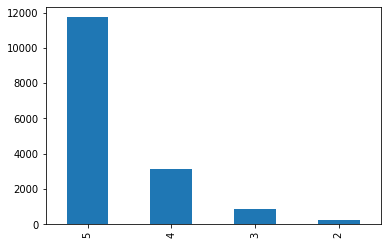

In [107]:
df['Nr. of Doors'].value_counts(dropna = False).plot(kind = "bar");

In [108]:
df['Nr. of Doors']=df['Nr. of Doors'].astype('int')

In [109]:
df['Nr. of Doors']

0        5
1        3
2        4
3        3
4        5
        ..
15914    5
15915    5
15916    5
15917    5
15918    5
Name: Nr. of Doors, Length: 15919, dtype: int64

In [110]:
df['Nr. of Seats'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64

In [111]:
df['Nr. of Seats']=df['Nr. of Seats'].str[0].str[1]

In [112]:
df['Nr. of Seats'].value_counts(dropna = False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: Nr. of Seats, dtype: int64

In [113]:
df[df['Nr. of Seats']=='3']

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
1636,Audi A1,Compact,23090,False,9821,1,141,Black,Metallic,part,2,3,"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],[\nfront\n],"[\n, Gasoline, \n]","[[5.8 l/100 km (comb)], [7.4 l/100 km (city)], [4.9 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Keyless central door lock, Light sensor, Multi-function steering wheel, Navigation system, Panorama roof, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system, Sunroof]","[Bluetooth, CD player, Digital radio, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB]","[Alloy wheels, Catalytic Converter, Sport package, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],2


In [114]:
df.loc[df['Nr. of Seats']=='3', 'Nr. of Seats']='4'

In [115]:
df[df['Nr. of Seats']=='6']

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
582,Audi A1,Compact,13500,True,100000,1,70,White,Metallic,cloth,5,6,"[\n, Manual, \n]","[\n1,000 cc\n]",[\n4\n],NaN,"[\n, Super 95, \n]",NaN,[\nEuro 6\n],[Air conditioning],[On-board computer],[Alloy wheels],[ABS],[\n5\n],3
15890,Renault Espace,Van,42490,True,0,0,147,Black,Metallic,cloth,5,6,"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[5.7 l/100 km (comb)], [6.1 l/100 km (city)], [5.3 l/100 km (country)]]",[\nEuro 6d-TEMP\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Keyless central door lock, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor]","[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]","[Alloy wheels, Touch screen]","[ABS, Blind spot monitor, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Emergency brake assistant, Immobilizer, Isofix, LED Daytime Running Lights, LED Headlights, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traffic sign recognition]",[\n6\n],0


In [116]:
df.groupby('make_model')['Nr. of Seats'].value_counts(dropna=False)

make_model      Nr. of Seats
Audi A1         5               1392
                4               1081
                NaN              140
                6                  1
Audi A2         5                  1
Audi A3         5               2951
                NaN              121
                4                 25
Opel Astra      5               2357
                NaN              164
                4                  5
Opel Corsa      5               2087
                NaN              120
                4                  7
                2                  5
Opel Insignia   5               2487
                NaN              108
                4                  2
                2                  1
Renault Clio    5               1520
                NaN              204
                2                110
                4                  5
Renault Duster  5                 34
Renault Espace  5                507
                7                362
         

In [117]:
df.iloc[582, 11]= '4'

In [118]:
df.iloc[15890, 11]= '5'

In [119]:
df[df['Nr. of Seats']=='6']

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age


In [120]:
df['Nr. of Seats'].ffill(inplace=True)

In [121]:
df.groupby('make_model')['Nr. of Seats'].value_counts(dropna=False)

make_model      Nr. of Seats
Audi A1         5               1468
                4               1146
Audi A2         5                  1
Audi A3         5               3072
                4                 25
Opel Astra      5               2521
                4                  5
Opel Corsa      5               2207
                4                  7
                2                  5
Opel Insignia   5               2595
                4                  2
                2                  1
Renault Clio    5               1708
                2                124
                4                  7
Renault Duster  5                 34
Renault Espace  5                574
                7                415
                4                  2
Name: Nr. of Seats, dtype: int64

In [122]:
df['Nr. of Seats']=df['Nr. of Seats'].astype('int')

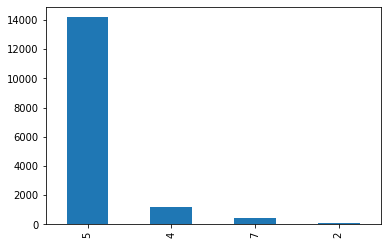

In [123]:
df['Nr. of Seats'].value_counts(dropna = False).plot(kind = "bar");

In [124]:
df['Gearing Type'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [125]:
df['Gearing Type'].str[1].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

In [126]:
df['Gearing Type']=df['Gearing Type'].str[1]

In [127]:
df['Gearing Type'].value_counts()

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

In [128]:
df.head(1)

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
0,Audi A1,Sedans,15770,True,56013,2,66,Black,Metallic,cloth,5,5,Automatic,"[\n1,422 cc\n]",[\n3\n],[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4


In [129]:
df['Displacement'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
                   ... 
[\n1,800 cc\n]        1
[\n140 cc\n]          1
[\n15,898 cc\n]       1
[\n1,686 cc\n]        1
[\n1,368 cc\n]        1
Name: Displacement, Length: 78, dtype: int64

In [130]:
df['Displacement'].str[0].str.lstrip('\n').str.rstrip('cc\n').str.replace(',', '')

0        1422 
1        1798 
2        1598 
3        1422 
4        1422 
         ...  
15914    1997 
15915    1798 
15916    1997 
15917    1997 
15918    1798 
Name: Displacement, Length: 15919, dtype: object

In [131]:
df['Displacement']=df['Displacement'].str[0].str.lstrip('\n').str.rstrip('cc\n').str.replace(',', '')

In [132]:
df['Displacement'].value_counts(dropna=False)

1598      4761
999       2438
1398      1314
1399       749
1229       677
          ... 
15898        1
1350         1
1995         1
1239         1
122          1
Name: Displacement, Length: 78, dtype: int64

In [133]:
df['Displacement'].isnull().sum()

496

In [134]:
df.groupby('make_model')['Displacement'].value_counts(dropna=False)

make_model      Displacement
Audi A1         999             1553
                1422             467
                1598             304
                1395             187
                NaN               29
                                ... 
Renault Espace  1589               2
                1596               2
                1580               1
                1800               1
                2000               1
Name: Displacement, Length: 134, dtype: int64

In [135]:
df.Displacement=pd.to_numeric(df.Displacement)

In [136]:
df.Displacement.ffill(inplace=True)

In [137]:
df.Displacement.isnull().sum()

0

In [138]:
df['Displacement'].value_counts(dropna=False).index

Float64Index([1598.0, 999.0, 1398.0, 1399.0, 1229.0, 1956.0, 1461.0, 1490.0, 1422.0, 898.0, 1197.0, 1395.0, 1968.0, 1149.0, 1798.0, 1618.0, 1498.0, 1600.0, 1248.0, 1997.0, 1364.0, 1400.0, 998.0, 1500.0, 2000.0, 1000.0, 1.0, 1998.0, 2480.0, 1200.0, 1984.0, 899.0, 1397.0, 160.0, 929.0, 1499.0, 900.0, 997.0, 1596.0, 139.0, 1396.0, 1599.0, 1199.0, 1589.0, 1300.0, 1495.0, 2.0, 995.0, 1533.0, 996.0, 1239.0, 1369.0, 1686.0, 1100.0, 15898.0, 973.0, 1333.0, 1568.0, 16000.0, 1584.0, 1368.0, 1696.0, 1896.0, 1856.0, 122.0, 890.0, 1496.0, 1580.0, 1800.0, 1195.0, 2967.0, 1390.0, 54.0, 140.0, 1350.0, 1995.0, 1198.0], dtype='float64')

In [139]:
df[df['Displacement']== 15898.0]

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
7169,Opel Astra,Station wagon,18490,True,22327,1,100,Green,Metallic,cloth,5,5,Automatic,15898.0,[\n4\n],[\nfront\n],"[\n, Super 95 (Particulate Filter), \n]","[[4.5 l/100 km (comb)], [5.7 l/100 km (city)], [3.8 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Heated steering wheel, Leather steering wheel, Lumbar support, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system camera, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating]","[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]","[Alloy wheels, Touch screen, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Emergency brake assistant, Fog lights, Immobilizer, Isofix, Lane departure warning system, LED Daytime Running Lights, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Traffic sign recognition]",[\n6\n],2


In [140]:
df.Displacement.iloc[7169]=1589

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [141]:
df[df['Displacement']== 16000.0]

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
10932,Opel Insignia,Station wagon,14300,True,76500,1,88,Grey,Metallic,full,5,5,Manual,16000.0,NaN,[\nfront\n],"[\n, Diesel, \n]",NaN,"[[], [], []]","[Air conditioning, Automatic climate control, Cruise control, Electrical side mirrors, Heads-up display, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Split rear seats, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB]","[Alloy wheels, Touch screen, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver drowsiness detection, Driver-side airbag, Electronic stability control, Emergency system, Fog lights, LED Daytime Running Lights, Passenger-side airbag, Power steering, Rear airbag, Side airbag, Tire pressure monitoring system, Traction control]",[\n6\n],4


In [142]:
df.Displacement.iloc[10932]=1600

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [143]:
df.loc[df['Displacement']<890, 'Displacement']=np.nan

In [144]:
df['Displacement'].value_counts(dropna=False).index.sort_values()

Float64Index([890.0, 898.0, 899.0, 900.0, 929.0, 973.0, 995.0, 996.0, 997.0, 998.0, 999.0, 1000.0, 1100.0, 1149.0, 1195.0, 1197.0, 1198.0, 1199.0, 1200.0, 1229.0, 1239.0, 1248.0, 1300.0, 1333.0, 1350.0, 1364.0, 1368.0, 1369.0, 1390.0, 1395.0, 1396.0, 1397.0, 1398.0, 1399.0, 1400.0, 1422.0, 1461.0, 1490.0, 1495.0, 1496.0, 1498.0, 1499.0, 1500.0, 1533.0, 1568.0, 1580.0, 1584.0, 1589.0, 1596.0, 1598.0, 1599.0, 1600.0, 1618.0, 1686.0, 1696.0, 1798.0, 1800.0, 1856.0, 1896.0, 1956.0, 1968.0, 1984.0, 1995.0, 1997.0, 1998.0, 2000.0, 2480.0, 2967.0, nan], dtype='float64')

In [145]:
df.Displacement.ffill(inplace=True)

In [146]:
df['Displacement'].value_counts(dropna=False)

1598.0    4945
999.0     2478
1398.0    1354
1399.0     780
1229.0     703
          ... 
1198.0       1
890.0        1
1995.0       1
1350.0       1
1580.0       1
Name: Displacement, Length: 68, dtype: int64

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   make_model               object 
 1   body_type                object 
 2   price                    int64  
 3   vat                      bool   
 4   km                       int64  
 5   prev_owner               object 
 6   hp                       int64  
 7   Body Color               object 
 8   Paint Type               object 
 9   Upholstery               object 
 10  Nr. of Doors             int64  
 11  Nr. of Seats             int64  
 12  Gearing Type             object 
 13  Displacement             float64
 14  Cylinders                object 
 15  Drive chain              object 
 16  Fuel                     object 
 17  Consumption              object 
 18  Emission Class           object 
 19  
Comfort & Convenience
  object 
 20  
Entertainment & Media
  object 
 21  
Extras
    

## Cylinders

In [148]:
df.Cylinders

0        [\n3\n]
1        [\n4\n]
2            NaN
3        [\n3\n]
4        [\n3\n]
          ...   
15914    [\n4\n]
15915    [\n4\n]
15916    [\n4\n]
15917    [\n4\n]
15918    [\n4\n]
Name: Cylinders, Length: 15919, dtype: object

In [149]:
df.Cylinders.isnull().sum()/15919

0.3568063320560337

In [150]:
df.Cylinders.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [151]:
df.Cylinders.str[0].str.strip('\n')

0          3
1          4
2        NaN
3          3
4          3
        ... 
15914      4
15915      4
15916      4
15917      4
15918      4
Name: Cylinders, Length: 15919, dtype: object

In [152]:
df['Cylinders']=df.Cylinders.str[0].str.strip('\n')

In [153]:
df.Cylinders.value_counts(dropna=False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: Cylinders, dtype: int64

In [154]:
df[df.Cylinders== '1']

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
9956,Opel Corsa,Compact,16625,True,100,1,66,Black,Metallic,cloth,3,5,Automatic,1398.0,1,[\nfront\n],"[\n, Super 95, \n]","[[6 l/100 km (comb)], [7.8 l/100 km (city)], [4.9 l/100 km (country)]]",[\nEuro 6d-TEMP\n],"[Air conditioning, Automatic climate control, Cruise control, Electrically heated windshield, Electrical side mirrors, Heated steering wheel, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system camera, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating]","[Bluetooth, Digital radio, Hands-free equipment, MP3, On-board computer, Radio]","[Alloy wheels, Sport suspension]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",[\n6\n],1


In [155]:
df.loc[df.Cylinders=='1', 'Cylinders']='4'

In [156]:
df.loc[df.Cylinders=='2', 'Cylinders']='4'

In [157]:
df[df.Cylinders== '2']

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age


In [158]:
df[df.Cylinders== '8']

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
535,Audi A1,Compact,12990,False,41200,1,70,Silver,Metallic,cloth,5,4,Manual,999.0,8,[\nfront\n],"[\n, Super 95, \n]","[[13.8 l/100 km (comb)], [19.9 l/100 km (city)], [10.3 l/100 km (country)]]",[\nEuro 4\n],"[Air conditioning, Automatic climate control, Electrical side mirrors, Lumbar support, Power windows]",NaN,"[Ski bag, Sport suspension]","[ABS, Alarm system, Central door lock, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Xenon headlights]",NaN,4
15055,Renault Espace,Van,24990,False,47423,1,117,Black,Metallic,full,5,7,Automatic,1598.0,8,NaN,"[\n, Diesel, \n]",NaN,NaN,[Park Distance Control],NaN,[Alloy wheels],NaN,NaN,3


In [159]:
df.loc[df.Cylinders=='8', 'Cylinders']='4'

In [160]:
df.iloc[[535,15055]]

,make_model,body_type,price,vat,km,prev_owner,hp,Body Color,Paint Type,Upholstery,Nr. of Doors,Nr. of Seats,Gearing Type,Displacement,Cylinders,Drive chain,Fuel,Consumption,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,Gears,age
535,Audi A1,Compact,12990,False,41200,1,70,Silver,Metallic,cloth,5,4,Manual,999.0,4,[\nfront\n],"[\n, Super 95, \n]","[[13.8 l/100 km (comb)], [19.9 l/100 km (city)], [10.3 l/100 km (country)]]",[\nEuro 4\n],"[Air conditioning, Automatic climate control, Electrical side mirrors, Lumbar support, Power windows]",NaN,"[Ski bag, Sport suspension]","[ABS, Alarm system, Central door lock, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Xenon headlights]",NaN,4
15055,Renault Espace,Van,24990,False,47423,1,117,Black,Metallic,full,5,7,Automatic,1598.0,4,NaN,"[\n, Diesel, \n]",NaN,NaN,[Park Distance Control],NaN,[Alloy wheels],NaN,NaN,3


In [161]:
df.Cylinders.value_counts(dropna=False)

4      8110
NaN    5680
3      2104
5        22
6         3
Name: Cylinders, dtype: int64

In [162]:
df['Cylinders'].fillna(method='ffill').value_counts(dropna=False)

4    12573
3     3320
5       23
6        3
Name: Cylinders, dtype: int64

In [163]:
df['Cylinders'].fillna(method='ffill', inplace=True)

In [164]:
df.groupby('Displacement')['Cylinders'].value_counts(dropna=False).head(30)

Displacement  Cylinders
890.0         3               1
898.0         3             309
              4              65
899.0         3              11
              4               1
900.0         4               4
929.0         3               4
              4               1
973.0         4               1
995.0         3               1
              4               1
996.0         4               1
997.0         3               4
998.0         3              42
              4              30
999.0         3            2140
              4             338
1000.0        3              26
              4              15
1100.0        4               1
1149.0        4             263
              3              46
              5               1
1195.0        4               1
1197.0        4             362
              3               4
1198.0        4               1
1199.0        4               2
              3               1
1200.0        4              17
Name: Cylinders,

In [165]:
df.groupby('Displacement')['Cylinders'].value_counts(dropna=False).tail(30)

Displacement  Cylinders
1596.0        4               2
1598.0        4            4822
              3             121
              5               1
              6               1
1599.0        4               3
1600.0        4             131
              3               2
              6               1
1618.0        4             216
1686.0        4               1
1696.0        4               1
1798.0        4             227
              3               1
1800.0        4               1
1856.0        4               1
1896.0        4               1
1956.0        4             690
1968.0        4             304
              3               7
1984.0        4              13
              3               4
              5               1
1995.0        4               1
1997.0        4             109
1998.0        4              28
2000.0        4              48
              3               1
2480.0        5              20
2967.0        6               1
Name: Cylinders,

In [166]:
df.drop("Cylinders", axis = 1, inplace = True) #no effect on price

In [167]:
df.columns = df.columns.str.lower()

In [168]:
df['drive chain'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: drive chain, dtype: int64

In [169]:
df['drive chain'].isnull().sum()/15919

0.4308059551479364

In [170]:
df.drop("drive chain", axis = 1, inplace = True)

In [171]:
df.head(1)

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,fuel,consumption,emission class,\ncomfort & convenience\n,\nentertainment & media\n,\nextras\n,\nsafety & security\n,gears,age
0,Audi A1,Sedans,15770,True,56013,2,66,Black,Metallic,cloth,5,5,Automatic,1422.0,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]",[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4


In [172]:
df['fuel'].unique

<bound method Series.unique of 0                          [\n, Diesel (Particulate Filter), \n]
1                                             [\n, Gasoline, \n]
2                          [\n, Diesel (Particulate Filter), \n]
3                          [\n, Diesel (Particulate Filter), \n]
4                          [\n, Diesel (Particulate Filter), \n]
                                  ...                           
15914                      [\n, Diesel (Particulate Filter), \n]
15915    [\n, Super 95 / Super Plus 98 (Particulate Filter), \n]
15916                                           [\n, Diesel, \n]
15917                                           [\n, Diesel, \n]
15918                                         [\n, Super 95, \n]
Name: fuel, Length: 15919, dtype: object>

In [173]:
df.fuel.str[1]

0                          Diesel (Particulate Filter)
1                                             Gasoline
2                          Diesel (Particulate Filter)
3                          Diesel (Particulate Filter)
4                          Diesel (Particulate Filter)
                             ...                      
15914                      Diesel (Particulate Filter)
15915    Super 95 / Super Plus 98 (Particulate Filter)
15916                                           Diesel
15917                                           Diesel
15918                                         Super 95
Name: fuel, Length: 15919, dtype: object

In [174]:
df['fuel_type']=df.fuel.str[1]

In [175]:
diesel_bool = df["fuel_type"].str.contains("diesel", case = False, regex = True)

In [176]:
lpg_bool = df["fuel_type"].str.contains("lpg|cng|bio|domestic|electric", case = False, regex = True)

In [177]:
df.loc[diesel_bool, "fuel_type"] = "Diesel"

In [178]:
df.loc[lpg_bool, "fuel_type"] = "LPG/CNG"

In [179]:
benz_list = list(df.fuel_type.loc[~diesel_bool].loc[~lpg_bool].index)
benz_list

[1,
 9,
 11,
 12,
 13,
 14,
 18,
 21,
 22,
 24,
 25,
 26,
 27,
 29,
 32,
 35,
 36,
 38,
 40,
 45,
 48,
 49,
 51,
 52,
 55,
 56,
 57,
 59,
 61,
 62,
 65,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 76,
 77,
 78,
 82,
 86,
 88,
 89,
 90,
 92,
 93,
 94,
 99,
 109,
 112,
 114,
 115,
 116,
 117,
 119,
 121,
 122,
 124,
 125,
 127,
 128,
 129,
 132,
 133,
 134,
 135,
 136,
 137,
 139,
 140,
 144,
 146,
 147,
 149,
 150,
 151,
 153,
 155,
 156,
 159,
 160,
 161,
 163,
 164,
 165,
 168,
 169,
 173,
 174,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 190,
 192,
 194,
 195,
 196,
 197,
 199,
 200,
 201,
 202,
 203,
 204,
 208,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 220,
 221,
 222,
 223,
 224,
 225,
 228,
 231,
 234,
 235,
 236,
 237,
 238,
 239,
 241,
 242,
 243,
 245,
 246,
 249,
 252,
 253,
 255,
 256,
 257,
 258,
 263,
 265,
 266,
 267,
 269,
 272,
 273,
 274,
 276,
 277,
 278,
 279,
 281,
 282,
 284,
 286,
 299,
 303,
 305,
 309,
 323,
 330,
 334,
 335,
 348,
 353,
 36

In [180]:
df.fuel_type.iloc[benz_list] = 'Benzine'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [181]:
df.fuel_type.value_counts(dropna=False)

Benzine    8550
Diesel     7299
LPG/CNG      70
Name: fuel_type, dtype: int64

In [182]:
df.drop("fuel", axis = 1, inplace = True)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   make_model               object 
 1   body_type                object 
 2   price                    int64  
 3   vat                      bool   
 4   km                       int64  
 5   prev_owner               object 
 6   hp                       int64  
 7   body color               object 
 8   paint type               object 
 9   upholstery               object 
 10  nr. of doors             int64  
 11  nr. of seats             int64  
 12  gearing type             object 
 13  displacement             float64
 14  consumption              object 
 15  emission class           object 
 16  
comfort & convenience
  object 
 17  
entertainment & media
  object 
 18  
extras
                 object 
 19  
safety & security
      object 
 20  gears                    object 
 21  age         

In [184]:
df.consumption.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[3.6 l/100 km (comb)], [], [4.4 l/100 km (country)]]                                    1
[\n, 4.8 l/100 km (comb), \n, 5.6 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[7.6 l/100 km (comb)], [], []]                                                          1
[[5.6 l/100 km (comb)], [7.6 l/100 km (city)], [4.4 l/100 km (country)]]                 1
[\n, 4.7 l/100 km (comb), \n, \n, \n]                                                    1

In [185]:
df['consumption'].isnull().sum()/len(df['consumption'])*100

11.973113889063383

In [186]:
df.consumption.sample(55)

5644               [[5.1 l/100 km (comb)], [6.1 l/100 km (city)], [4.6 l/100 km (country)]]
457                  [[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]
13909              [[5.6 l/100 km (comb)], [7.2 l/100 km (city)], [4.7 l/100 km (country)]]
15018              [[6.8 l/100 km (comb)], [8.7 l/100 km (city)], [5.7 l/100 km (country)]]
6978               [[5.1 l/100 km (comb)], [6.3 l/100 km (city)], [4.3 l/100 km (country)]]
3945               [[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]
12656                    [[6 l/100 km (comb)], [7 l/100 km (city)], [5 l/100 km (country)]]
9959               [[4.8 l/100 km (comb)], [5.8 l/100 km (city)], [4.1 l/100 km (country)]]
9760                                                        [[5.4 l/100 km (comb)], [], []]
837                  [[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]
6488                   [[4 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km 

In [187]:
df.consumption.str[0]

0        [3.8 l/100 km (comb)]
1        [5.6 l/100 km (comb)]
2        [3.8 l/100 km (comb)]
3        [3.8 l/100 km (comb)]
4        [4.1 l/100 km (comb)]
                 ...          
15914    [5.3 l/100 km (comb)]
15915                       \n
15916    [5.3 l/100 km (comb)]
15917    [5.3 l/100 km (comb)]
15918    [6.8 l/100 km (comb)]
Name: consumption, Length: 15919, dtype: object

In [188]:
df.consumption.str[0].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                      1906
\n                        850
[3.9 l/100 km (comb)]     732
[4 l/100 km (comb)]       712
[5.4 l/100 km (comb)]     662
                         ... 
[43 l/100 km (comb)]        1
[1 l/100 km (comb)]         1
[50 l/100 km (comb)]        1
[33 l/100 km (comb)]        1
[1.2 l/100 km (comb)]       1
Name: consumption, Length: 82, dtype: int64

In [189]:
df.consumption.str[0].value_counts(dropna=False).sample(55)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[3.4 kg/100 km (comb)]     12
[8.1 l/100 km (comb)]       2
[5.4 l/100 km (comb)]     662
[4.7 l/100 km (comb)]     555
[3.9 l/100 km (comb)]     732
[8.6 l/100 km (comb)]       3
[4 l/100 km (comb)]       712
[6.4 l/100 km (comb)]      64
[3.1 l/100 km (comb)]       7
[13.8 l/100 km (comb)]      1
[4.8 l/100 km (comb)]     523
[3.6 kg/100 km (comb)]      1
[]                        127
[50 l/100 km (comb)]        1
[5.2 l/100 km (comb)]     429
[1.2 l/100 km (comb)]       1
[9.1 l/100 km (comb)]       1
[5.8 l/100 km (comb)]     142
[6.2 l/100 km (comb)]     184
[40 l/100 km (comb)]        2
[7.2 l/100 km (comb)]       6
[7.6 l/100 km (comb)]      14
[6.6 l/100 km (comb)]     119
[46 l/100 km (comb)]        1
[5.1 l/100 km (comb)]     627
[5.1 kg/100 km (comb)]      3
[6.5 l/100 km (comb)]      36
[5.3 kg/100 km (comb)]      1
[6.7 l/100 km (comb)]      33
[3.3 l/100 km (comb)]     298
[33 l/100 km (comb)]        1
[3 l/100 km (comb)]        69
[7.5 l/100 km (comb)]       1
[3.2 l/100

In [190]:
df.consumption.str[0].value_counts(dropna=False).sample(55)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[32 l/100 km (comb)]        1
[7.9 l/100 km (comb)]       2
[3.9 l/100 km (comb)]     732
[4.3 l/100 km (comb)]     295
[5.1 l/100 km (comb)]     627
[5 l/100 km (comb)]       513
[3.3 l/100 km (comb)]     298
[50 l/100 km (comb)]        1
[1.2 l/100 km (comb)]       1
[5.1 kg/100 km (comb)]      3
[6.9 l/100 km (comb)]      21
[5.3 kg/100 km (comb)]      1
[8 l/100 km (comb)]         5
[6.7 l/100 km (comb)]      33
[7.8 l/100 km (comb)]       6
[5.3 l/100 km (comb)]     374
[3.3 kg/100 km (comb)]      9
[8.3 l/100 km (comb)]      19
[6.3 l/100 km (comb)]     141
[6 l/100 km (comb)]       278
[3.6 l/100 km (comb)]     193
[3 l/100 km (comb)]        69
[0 l/100 km (comb)]         2
[4.2 l/100 km (comb)]     408
[13.8 l/100 km (comb)]      1
[6.2 l/100 km (comb)]     184
[5.4 l/100 km (comb)]     662
[3.8 l/100 km (comb)]     585
[4.5 l/100 km (comb)]     511
[11 l/100 km (comb)]        1
[3.5 kg/100 km (comb)]      3
[5.8 l/100 km (comb)]     142
[40 l/100 km (comb)]        2
[]        

In [191]:
df.consumption.str[0].value_counts(dropna=False).index

Index([nan, '\n', ['3.9 l/100 km (comb)'], ['4 l/100 km (comb)'], ['5.4 l/100 km (comb)'], ['5.1 l/100 km (comb)'], ['4.4 l/100 km (comb)'], ['3.8 l/100 km (comb)'], ['5.6 l/100 km (comb)'], ['4.7 l/100 km (comb)'], ['4.8 l/100 km (comb)'], ['5 l/100 km (comb)'], ['4.5 l/100 km (comb)'], ['5.2 l/100 km (comb)'], ['4.6 l/100 km (comb)'], ['4.2 l/100 km (comb)'], ['5.3 l/100 km (comb)'], ['3.7 l/100 km (comb)'], ['4.9 l/100 km (comb)'], ['5.5 l/100 km (comb)'], ['4.1 l/100 km (comb)'], ['5.9 l/100 km (comb)'], ['5.7 l/100 km (comb)'], ['3.3 l/100 km (comb)'], ['4.3 l/100 km (comb)'], ['3.5 l/100 km (comb)'], ['6 l/100 km (comb)'], ['3.6 l/100 km (comb)'], ['6.2 l/100 km (comb)'], ['5.8 l/100 km (comb)'], ['6.3 l/100 km (comb)'], ['6.1 l/100 km (comb)'], ['6.8 l/100 km (comb)'], [], ['6.6 l/100 km (comb)'], ['3.4 l/100 km (comb)'], ['3 l/100 km (comb)'], ['6.4 l/100 km (comb)'], ['7.4 l/100 km (comb)'], ['7.1 l/100 km (comb)'], ['6.5 l/100 km (comb)'], ['10 l/100 km (comb)'], ['6.7 l/100 

In [192]:
df.consumption.str[0].str[0].value_counts(dropna=False)

NaN                     2033
\n                       850
3.9 l/100 km (comb)      732
4 l/100 km (comb)        712
5.4 l/100 km (comb)      662
                        ... 
5.4 kg/100 km (comb)       1
50 l/100 km (comb)         1
55 l/100 km (comb)         1
33 l/100 km (comb)         1
1.2 l/100 km (comb)        1
Name: consumption, Length: 81, dtype: int64

In [193]:
df.consumption.str[0].str[0].str.extract("(\d.\d|\d\d.\d|\d)")[0].unique()

array(['3.8', '5.6', '4.1', '3.5', '3.7', nan, '4', '4.9', '4.2', '4.5',
       '4.4', '4.3', '3', '3.6', '3.4', '3.9', '5.1', '5.2', '4.6', '4.8',
       '5.8', '4.7', '5', '13.8', '6', '5.9', '5.3', '5.5', '1', '3.3',
       '3.2', '6.6', '8.3', '6.5', '7.1', '8.1', '5.4', '6.4', '6.7',
       '6.2', '7.3', '6.3', '5.7', '6.1', '6.8', '7.5', '7.4', '0', '7.8',
       '3.1', '6.9', '7', '7.2', '8', '9.1', '8.6', '8.7', '7.9', '1.2',
       '7.6'], dtype=object)

In [194]:
df.consumption.str[0].str[0].str.extract("(^\d*.\d*)").iloc[:,0].unique()

array(['3.8', '5.6', '4.1', '3.5', '3.7', nan, '4 ', '4.9', '4.2', '4.5',
       '4.4', '4.3', '3 ', '3.6', '3.4', '3.9', '5.1', '5.2', '4.6',
       '4.8', '5.8', '4.7', '5 ', '43 ', '13.8', '6 ', '5.9', '51 ',
       '5.3', '5.5', '10 ', '3.3', '3.2', '6.6', '8.3', '6.5', '7.1',
       '8.1', '5.4', '40 ', '38 ', '6.4', '6.7', '6.2', '7.3', '6.3',
       '5.7', '6.1', '6.8', '7.5', '7.4', '0 ', '7.8', '3.1', '6.9', '7 ',
       '7.2', '8 ', '11 ', '9.1', '8.6', '8.7', '7.9', '55 ', '54 ',
       '1.2', '32 ', '33 ', '50 ', '1 ', '46 ', '7.6'], dtype=object)

In [195]:
df.consumption.str[0].str[0].str.extract("(\d.\d|\d)").isnull().sum()*100/df.consumption.str[0].str[0].str.extract('(\d.\d|\d)').shape[0]

0    18.110434
dtype: float64

In [196]:
df["consumption_comb"] = df.consumption.str[0].str[0].str.extract("(\d.\d|1\d.\d|\d)")

In [197]:
df.consumption_comb.value_counts(dropna = False)

NaN     2883
3.9      732
4        716
5.4      663
5.1      630
4.4      595
3.8      585
5.6      568
4.7      555
4.8      523
5        520
4.5      511
5.2      429
4.6      420
4.2      408
5.3      375
3.7      369
4.9      348
5.5      342
4.1      341
5.9      308
3.3      307
5.7      302
4.3      295
3.5      288
6        278
3.6      194
6.2      184
5.8      142
6.3      141
6.1      135
6.8      134
6.6      119
3.4      106
3         73
6.4       64
7.4       62
7.1       38
1         36
6.5       36
6.7       33
3.2       25
6.9       21
8.3       20
7.6       14
7          9
3.1        7
7.2        6
7.8        6
8          5
8.6        3
8.7        3
7.9        2
8.1        2
7.3        2
0          2
9.1        1
7.5        1
1.2        1
13.8       1
Name: consumption_comb, dtype: int64

In [198]:
df.consumption.str[1].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                        1906
[5 l/100 km (city)]         642
[5.8 l/100 km (city)]       597
[4.5 l/100 km (city)]       577
[]                          516
                           ... 
[64 l/100 km (city)]          1
[6.5 kg/100 km (city)]        1
[9 l/100 km (city)]           1
[6.8 kg/100 km (city)]        1
[10.5 kg/100 km (city)]       1
Name: consumption, Length: 130, dtype: int64

In [199]:
df.consumption.str[1].value_counts(dropna = False).sample(55)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[6.6 l/100 km (city)]     337
[3.8 l/100 km (city)]      25
4 l/100 km (comb)           1
[5.4 l/100 km (city)]     289
[6.5 kg/100 km (city)]      1
[3.4 l/100 km (city)]      50
[7 l/100 km (city)]       184
[11 l/100 km (city)]        4
[8 l/100 km (city)]       101
4.5 l/100 km (comb)        12
6.9 l/100 km (comb)         6
6.3 l/100 km (comb)        40
[7.8 l/100 km (city)]     341
[3.3 l/100 km (city)]      30
5.1 l/100 km (comb)        27
[7.5 l/100 km (city)]     217
[7.7 l/100 km (city)]     165
[5.5 l/100 km (city)]     207
[3 l/100 km (city)]         9
[66 l/100 km (city)]        1
3.9 l/100 km (comb)         1
[3.9 l/100 km (city)]     245
5.4 l/100 km (comb)       107
[10.2 l/100 km (city)]     21
[19.9 l/100 km (city)]      1
[4.1 l/100 km (city)]     320
[9.6 l/100 km (city)]      41
[4.3 kg/100 km (city)]     21
[4 l/100 km (city)]       300
[4.5 l/100 km (city)]     577
[5.6 l/100 km (city)]     100
5.7 l/100 km (comb)        40
[3.5 l/100 km (city)]     230
[4.2 l/100

In [200]:
df.consumption.str[1].value_counts(dropna = False).sample(55)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[11.3 l/100 km (city)]       19
[4.3 l/100 km (city)]       512
NaN                        1906
[6.7 l/100 km (city)]       286
[4.4 l/100 km (city)]       135
[9.5 l/100 km (city)]         2
[8.1 l/100 km (city)]        21
[7.3 l/100 km (city)]       354
[8.8 l/100 km (city)]         2
[3 l/100 km (city)]           9
[4.9 l/100 km (city)]        58
[10.5 kg/100 km (city)]       1
6.8 l/100 km (comb)           2
6 l/100 km (comb)            53
6.1 l/100 km (comb)          40
[16.1 l/100 km (city)]        1
[7.6 l/100 km (city)]       227
[66 l/100 km (city)]          1
5 l/100 km (comb)            32
[3.6 l/100 km (city)]         2
[5.2 l/100 km (city)]       333
[3.8 l/100 km (city)]        25
5.4 l/100 km (comb)         107
[6.1 l/100 km (city)]       151
[6 l/100 km (city)]         239
[9 l/100 km (city)]           1
7.4 l/100 km (comb)           4
[0 l/100 km (city)]           6
[4.3 kg/100 km (city)]       21
[4 l/100 km (city)]         300
[10.8 l/100 km (city)]        3
6.3 l/10

In [201]:
df.consumption.str[1].value_counts(dropna = False).sample(55)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


5.7 l/100 km (comb)         40
[11.2 l/100 km (city)]       4
[5.9 l/100 km (city)]      344
[8.5 l/100 km (city)]       30
[4.3 kg/100 km (city)]      21
[5.7 l/100 km (city)]      365
[10.5 kg/100 km (city)]      1
4.7 l/100 km (comb)         47
[16.1 l/100 km (city)]       1
[7.5 l/100 km (city)]      217
6 l/100 km (comb)           53
[4.4 l/100 km (city)]      135
[3.3 l/100 km (city)]       30
3.9 l/100 km (comb)          1
5.2 l/100 km (comb)         25
6.7 l/100 km (comb)         10
[43 l/100 km (city)]         2
[19.9 l/100 km (city)]       1
[9.8 l/100 km (city)]        5
[4.9 l/100 km (city)]       58
[10.2 l/100 km (city)]      21
[8.8 l/100 km (city)]        2
[6.7 l/100 km (city)]      286
6.8 l/100 km (comb)          2
[8.6 l/100 km (city)]       27
[8.9 l/100 km (city)]        4
4.8 l/100 km (comb)         23
[64 l/100 km (city)]         1
[3.6 l/100 km (city)]        2
[]                         516
5.4 l/100 km (comb)        107
[62 l/100 km (city)]         4
[5.8 l/1

In [202]:
consumption_temp = df.consumption.str[1].str.extract("(\d.\d|1\d.\d|\d)")

In [203]:
consumption_temp.head()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [204]:
consumption_temp[0].value_counts(dropna = False)

NaN    15069
5.4      107
5.9       61
6         53
5.6       50
4.7       47
4.9       45
5.7       40
6.1       40
6.3       40
5.5       38
6.2       32
5         32
6.6       29
4.4       28
4.2       27
5.1       27
5.2       25
4.8       23
5.8       22
4.5       12
4.3       12
6.4       11
6.7       10
6.5        7
6.9        6
4.6        6
5.3        5
7.4        4
1.6        3
6.8        2
4          1
7          1
3.9        1
7.9        1
8.6        1
4.1        1
Name: 0, dtype: int64

In [205]:
df.consumption_comb.fillna(consumption_temp[0]).value_counts(dropna = False)

NaN     2033
5.4      770
3.9      733
4        717
5.1      657
        ... 
0          2
9.1        1
7.5        1
1.2        1
13.8       1
Name: consumption_comb, Length: 61, dtype: int64

In [206]:
df.consumption_comb.fillna(consumption_temp[0], inplace = True)

In [207]:
df.consumption_comb.value_counts(dropna=False)

NaN     2033
5.4      770
3.9      733
4        717
5.1      657
        ... 
0          2
9.1        1
7.5        1
1.2        1
13.8       1
Name: consumption_comb, Length: 61, dtype: int64

In [208]:
df.consumption_comb.isnull().sum()*100/df.consumption_comb.shape[0]

12.770902694892895

In [209]:
df["consumption"].str[-2].str[0].value_counts(dropna = False)

NaN                     2422
5 l/100 km (city)        642
5.8 l/100 km (city)      597
4.5 l/100 km (city)      577
4                        532
                        ... 
9.7 l/100 km (city)        1
6.8 kg/100 km (city)       1
16.1 l/100 km (city)       1
64 l/100 km (city)         1
19.9 l/100 km (city)       1
Name: consumption, Length: 99, dtype: int64

In [210]:
df["consumption"].str[-2].str[0].unique()

array(['4.3 l/100 km (city)', '7.1 l/100 km (city)',
       '4.4 l/100 km (city)', '4.6 l/100 km (city)',
       '4.2 l/100 km (city)', nan, '6.2 l/100 km (city)',
       '5 l/100 km (city)', '5.5 l/100 km (city)', '5.4 l/100 km (city)',
       '3.8 l/100 km (city)', '5.2 l/100 km (city)', '3 l/100 km (city)',
       '4 l/100 km (city)', '3.9 l/100 km (city)', '4.1 l/100 km (city)',
       '3', '4.7 l/100 km (city)', '6.3 l/100 km (city)',
       '6.7 l/100 km (city)', '5.6 l/100 km (city)',
       '4.8 l/100 km (city)', '6.6 l/100 km (city)',
       '4.5 l/100 km (city)', '5.8 l/100 km (city)', '4',
       '7.4 l/100 km (city)', '6.1 l/100 km (city)',
       '3.7 l/100 km (city)', '5.1 l/100 km (city)',
       '19.9 l/100 km (city)', '6.4 l/100 km (city)',
       '8.2 l/100 km (city)', '6 l/100 km (city)', '6.5 l/100 km (city)',
       '5.9 l/100 km (city)', '8 l/100 km (city)', '62 l/100 km (city)',
       '6.8 l/100 km (city)', '7.5 l/100 km (city)',
       '3.5 l/100 km (city)', '5

In [211]:
df["consumption"].str[-2].str[0].str.extract("(\d.\d|^\d\d.\d|\d)")[0].value_counts(dropna = False)

NaN     2436
5        858
4        836
5.8      600
4.5      580
        ... 
9          1
10.4       1
16.1       1
10.5       1
9.7        1
Name: 0, Length: 80, dtype: int64

In [212]:
consumption_city = df["consumption"].str[-2].str[0].str.extract("(\d.\d|^\d\d.\d|\d)")

In [213]:
consumption_city = pd.to_numeric(consumption_city[0])

In [214]:
consumption_city

0        4.3
1        7.1
2        4.4
3        4.3
4        4.6
        ... 
15914    6.2
15915    6.0
15916    6.2
15917    6.2
15918    8.7
Name: 0, Length: 15919, dtype: float64

In [215]:
df["consumption"].str[-1].str[0].unique()

array(['3.5 l/100 km (country)', '4.7 l/100 km (country)',
       '3.4 l/100 km (country)', '3.8 l/100 km (country)',
       '3.1 l/100 km (country)', nan, '3.6 l/100 km (country)',
       '4.2 l/100 km (country)', '3.7 l/100 km (country)',
       '3.9 l/100 km (country)', '3.3 l/100 km (country)',
       '3 l/100 km (country)', '\n', '4.4 l/100 km (country)',
       '4 l/100 km (country)', '4.3 l/100 km (country)',
       '4.9 l/100 km (country)', '4.1 l/100 km (country)',
       '4.5 l/100 km (country)', '3.2 l/100 km (country)',
       '10.3 l/100 km (country)', '5.1 l/100 km (country)',
       '6.7 l/100 km (country)', '6.3 l/100 km (country)',
       '4.8 l/100 km (country)', '44 l/100 km (country)',
       '5.4 l/100 km (country)', '4.6 l/100 km (country)',
       '4.6 kg/100 km (country)', '2.9 kg/100 km (country)',
       '2.8 kg/100 km (country)', '5.6 l/100 km (country)',
       '6.6 l/100 km (country)', '6 l/100 km (country)',
       '6.5 l/100 km (country)', '4.5 kg/100 km 

In [216]:
df['consumption'].str[-1].str[0].value_counts(dropna = False)

NaN                        2362
4.2 l/100 km (country)     1101
3.7 l/100 km (country)     1059
\n                          850
4.4 l/100 km (country)      829
                           ... 
8.6 l/100 km (country)        1
4.5 kg/100 km (country)       1
6.9 l/100 km (country)        1
3 kg/100 km (country)         1
6.9 kg/100 km (country)       1
Name: consumption, Length: 65, dtype: int64

In [217]:
df['consumption'].str[-1].str[0].str.extract('(\d.\d|\d\d.\d|\d)')[0].value_counts(dropna = False)

NaN     3212
4.2     1101
3.7     1059
4.4      829
4.5      789
3.8      775
3.9      759
4.1      569
4.7      562
4        560
3.5      525
4.3      496
3.6      486
3.1      481
3.3      456
4.6      446
4.9      410
3.4      353
4.8      289
5.3      227
5.1      215
5.7      191
5.4      190
3.2      180
3        146
5.6      131
5        106
5.2       84
6.3       49
6         35
1         33
5.8       30
5.5       30
7.7       20
6.6       19
2.9       16
6.4       15
0          9
2.8        9
6.5        4
7.3        4
7.1        3
6.9        2
7.8        2
7          2
6.7        2
5.9        2
8.6        1
2          1
6.1        1
7.6        1
10.3       1
8          1
Name: 0, dtype: int64

In [218]:
consumption_country = df['consumption'].str[-1].str[0].str.extract('(\d.\d|\d\d.\d|\d)')

In [219]:
consumption_country = pd.to_numeric(consumption_country[0])

In [220]:
consumption_country

0        3.5
1        4.7
2        3.4
3        3.5
4        3.8
        ... 
15914    4.7
15915    NaN
15916    4.7
15917    4.7
15918    5.7
Name: 0, Length: 15919, dtype: float64

In [221]:
consumption_temp1 = (consumption_city + consumption_country) / 2

In [222]:
df.consumption_comb.fillna(consumption_temp1,inplace=True)

In [223]:
df.consumption_comb.value_counts(dropna=False)

NaN     1925
5.4      770
3.9      733
4        717
5.1      657
        ... 
13.8       1
4.55       1
7.5        1
1.2        1
9.1        1
Name: consumption_comb, Length: 71, dtype: int64

In [224]:
df.consumption_comb = pd.to_numeric(df.consumption_comb)

In [225]:
df.consumption_comb.sort_values().head(55).unique()

array([0. , 1. , 1.2, 1.6, 3. ])

In [226]:
df.consumption_comb.sort_values().tail(55).unique()

array([nan])

In [227]:
df.consumption_comb.sort_values().unique()

array([ 0.  ,  1.  ,  1.2 ,  1.6 ,  3.  ,  3.1 ,  3.2 ,  3.3 ,  3.4 ,
        3.5 ,  3.6 ,  3.6 ,  3.65,  3.7 ,  3.8 ,  3.9 ,  3.95,  4.  ,
        4.1 ,  4.2 ,  4.3 ,  4.4 ,  4.5 ,  4.55,  4.6 ,  4.7 ,  4.8 ,
        4.9 ,  5.  ,  5.1 ,  5.15,  5.2 ,  5.3 ,  5.4 ,  5.45,  5.5 ,
        5.6 ,  5.7 ,  5.8 ,  5.9 ,  6.  ,  6.1 ,  6.2 ,  6.3 ,  6.4 ,
        6.5 ,  6.6 ,  6.7 ,  6.8 ,  6.9 ,  7.  ,  7.1 ,  7.2 ,  7.3 ,
        7.4 ,  7.5 ,  7.6 ,  7.8 ,  7.9 ,  8.  ,  8.1 ,  8.3 ,  8.6 ,
        8.7 ,  9.1 , 13.8 ,   nan])

In [228]:
consumption_outlier = df.consumption_comb.isin([0.00, 1.00, 1.20, 1.60])

In [229]:
consumption_outlier.value_counts(dropna=False)

False    15877
True        42
Name: consumption_comb, dtype: int64

In [230]:
df.loc[consumption_outlier, "consumption_comb"] = np.nan

In [231]:
df.groupby("make_model")["consumption_comb"].mean()

make_model
Audi A1           4.374835
Audi A2           4.900000
Audi A3           4.330698
Opel Astra        4.705810
Opel Corsa        5.500861
Opel Insignia     5.382063
Renault Clio      4.714295
Renault Duster         NaN
Renault Espace    5.402693
Name: consumption_comb, dtype: float64

In [232]:
df.groupby("make_model")["consumption_comb"].median()

make_model
Audi A1           4.4
Audi A2           4.9
Audi A3           4.1
Opel Astra        4.6
Opel Corsa        5.4
Opel Insignia     5.5
Renault Clio      5.0
Renault Duster    NaN
Renault Espace    4.7
Name: consumption_comb, dtype: float64

In [233]:
df.groupby(by=["make_model","displacement"])["consumption_comb"].mean()

make_model      displacement
Audi A1         929.0           4.240000
                995.0           4.550000
                998.0           4.200000
                999.0           4.548973
                1000.0          4.622222
                                  ...   
Renault Espace  1618.0          6.274286
                1798.0          6.990710
                1800.0          7.600000
                1997.0          5.337000
                2000.0               NaN
Name: consumption_comb, Length: 116, dtype: float64

In [234]:
df["consumption_comb"] = df["consumption_comb"].fillna(df.groupby(by=["displacement"])["consumption_comb"].transform("mean"))

In [235]:
df.consumption_comb.isnull().sum()

12

In [236]:
df["consumption_comb"].mean()

4.8330270829356206

In [237]:
df["consumption_comb"] = df["consumption_comb"].fillna(df["consumption_comb"].mean())

In [238]:
df.consumption_comb.sort_values().tail(55)

14896     7.673333
14895     7.673333
14894     7.673333
11324     7.673333
14900     7.673333
12554     7.673333
12417     7.673333
10484     7.673333
14902     7.673333
14901     7.673333
8326      7.800000
8321      7.800000
8319      7.800000
11432     7.800000
8270      7.800000
8268      7.800000
12620     7.900000
11219     7.900000
11221     7.900000
10744     8.000000
10571     8.000000
10548     8.000000
10507     8.000000
12654     8.000000
3608      8.100000
3609      8.100000
3592      8.300000
3590      8.300000
3593      8.300000
3595      8.300000
3596      8.300000
3587      8.300000
3603      8.300000
3598      8.300000
3649      8.300000
3610      8.300000
3606      8.300000
3605      8.300000
10515     8.300000
3604      8.300000
5161      8.300000
3601      8.300000
3600      8.300000
3599      8.300000
3602      8.300000
3648      8.300000
12553     8.600000
12530     8.600000
10789     8.600000
12422     8.600000
12529     8.700000
10817     8.700000
12054     8.

In [239]:
df.consumption_comb.describe()

count    15919.000000
mean         4.833027
std          0.891709
min          3.000000
25%          4.100000
50%          4.800000
75%          5.469613
max         13.800000
Name: consumption_comb, dtype: float64

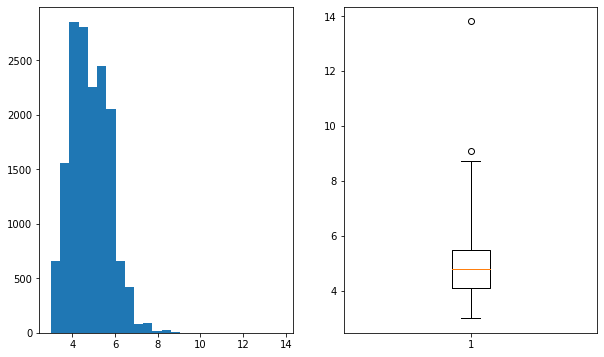

In [240]:
plt.figure(figsize = (10, 6))
plt.subplot(121)
plt.hist(df.consumption_comb, bins = 25)

plt.subplot(122)
plt.boxplot(df.consumption_comb, whis = 2.5)

plt.show()

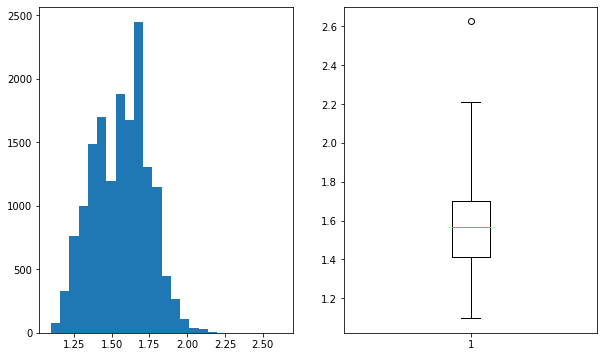

In [241]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(np.log(df.consumption_comb), bins=25)

plt.subplot(122)
plt.boxplot(np.log(df.consumption_comb), whis = 2)

plt.show()

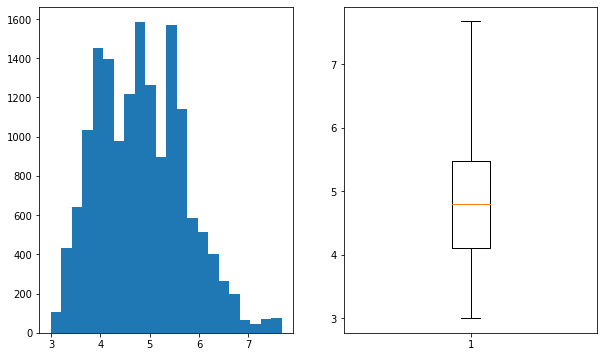

In [242]:
from scipy.stats.mstats import winsorize

plt.figure(figsize=(10,6))
plt.subplot(121)
plt.hist(winsorize(df.consumption_comb, (0.003)), bins=22)

plt.subplot(122)
plt.boxplot(winsorize(df.consumption_comb, (0.003)), whis = 2)

plt.show()

In [243]:
df.drop("consumption",axis=1,inplace=True)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   make_model               object 
 1   body_type                object 
 2   price                    int64  
 3   vat                      bool   
 4   km                       int64  
 5   prev_owner               object 
 6   hp                       int64  
 7   body color               object 
 8   paint type               object 
 9   upholstery               object 
 10  nr. of doors             int64  
 11  nr. of seats             int64  
 12  gearing type             object 
 13  displacement             float64
 14  emission class           object 
 15  
comfort & convenience
  object 
 16  
entertainment & media
  object 
 17  
extras
                 object 
 18  
safety & security
      object 
 19  gears                    object 
 20  age                      int64  
 21  fuel_type   

# emission class

In [245]:
df['emission class'].isnull().sum()/df['emission class'].shape[0]*100

18.97732269614926

In [246]:
df['emission class'].str[0].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\nEuro 6\n          10139
NaN                  3021
\nEuro 6d-TEMP\n     1845
[]                    607
\nEuro 6c\n           127
\nEuro 5\n             78
\nEuro 6d\n            62
\nEuro 4\n             40
Name: emission class, dtype: int64

In [247]:
df['emission class'].str[0].str.strip('\n').value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission class, dtype: int64

In [248]:
df['emission class'] = df['emission class'].str[0].str.strip('\n')

In [249]:
df.replace({"emission class" : {"Euro 6d-TEMP":"Euro 6", "Euro 6c":"Euro 6", "Euro 6d":"Euro 6"}}, regex = True, inplace = True)

In [250]:
df["emission class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: emission class, dtype: int64

In [251]:
df.drop("emission class",axis=1,inplace=True)

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 22 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   make_model               object 
 1   body_type                object 
 2   price                    int64  
 3   vat                      bool   
 4   km                       int64  
 5   prev_owner               object 
 6   hp                       int64  
 7   body color               object 
 8   paint type               object 
 9   upholstery               object 
 10  nr. of doors             int64  
 11  nr. of seats             int64  
 12  gearing type             object 
 13  displacement             float64
 14  
comfort & convenience
  object 
 15  
entertainment & media
  object 
 16  
extras
                 object 
 17  
safety & security
      object 
 18  gears                    object 
 19  age                      int64  
 20  fuel_type                object 
 21  consumption_

In [253]:
df["\ncomfort & convenience\n"]

0                                                                                                                                                                                               [Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]
1                                                                                                                                                                                                                                                                                                                                   [Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system

In [254]:
df["\ncomfort & convenience\n"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                     920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                 216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                      

In [255]:
df["\ncomfort & convenience\n"].value_counts(dropna=False).head(50)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [256]:
df["\ncomfort & convenience\n"].value_counts(dropna=False).tail(50)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Air conditioning, Automatic climate control, Cruise control, Electrically adjustable seats, Electrical side mirrors, Heated steering wheel, Hill Holder, Leather steering wheel, Lumbar support, Multi-function steering wheel, Navigation system, Power windows, Rain sensor, Seat heating, Seat ventilation]                                                                                                                                        1
[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Leather steering wheel, Multi-function steering wheel, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Split rear seats, Start-stop system]                                                                                                                                                            1
[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Electric tailgate, Hea

In [257]:
def unique_values(data, column_name):
    unique_vals = set()
    for rows in data[column_name]:
        unique_vals.update(rows)
    return list(unique_vals)

In [258]:
nans = df["\ncomfort & convenience\n"].isnull()

In [259]:
df.loc[nans, '\ncomfort & convenience\n']

9        NaN
30       NaN
53       NaN
168      NaN
191      NaN
        ... 
15791    NaN
15804    NaN
15805    NaN
15854    NaN
15864    NaN
Name: \ncomfort & convenience\n, Length: 920, dtype: object

In [260]:
def Nan_to_list(data, column_name):
    NaN_rows = data[column_name].isnull()
    data.loc[NaN_rows, column_name] = data.loc[NaN_rows, column_name].apply(lambda x : [])

In [261]:
Nan_to_list(df, '\ncomfort & convenience\n')
unique_values(df, '\ncomfort & convenience\n')

['Keyless central door lock',
 'Automatic climate control',
 'Sunroof',
 'Seat heating',
 'Air conditioning',
 'Power windows',
 'Heads-up display',
 'Light sensor',
 'Tinted windows',
 'Electrically heated windshield',
 'Parking assist system sensors front',
 'Hill Holder',
 'Lumbar support',
 'Parking assist system camera',
 'Armrest',
 'Split rear seats',
 'Panorama roof',
 'Leather steering wheel',
 'Electrical side mirrors',
 'Massage seats',
 'Multi-function steering wheel',
 'Electric Starter',
 'Air suspension',
 'Parking assist system self-steering',
 'Park Distance Control',
 'Windshield',
 'Navigation system',
 'Start-stop system',
 'Auxiliary heating',
 'Parking assist system sensors rear',
 'Electric tailgate',
 'Leather seats',
 'Cruise control',
 'Rain sensor',
 'Heated steering wheel',
 'Electrically adjustable seats',
 'Seat ventilation',
 'Wind deflector']

In [262]:
nxtins_list = [",".join(item).strip() if type(item) == list else item for item in df['\ncomfort & convenience\n']]

In [263]:
df["comfort&convenience"] = pd.DataFrame(nxtins_list)

In [264]:
df["comfort&convenience"].value_counts(dropna=False)

                                                                                                                                                                                                                                                                                                                                                      920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                    216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                              

In [265]:
df[df['comfort&convenience'] == ""]

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,\ncomfort & convenience\n,\nentertainment & media\n,\nextras\n,\nsafety & security\n,gears,age,fuel_type,consumption_comb,comfort&convenience
9,Audi A1,Sedans,17990,False,16103,1,70,White,Metallic,cloth,5,4,Automatic,999.0,[],NaN,NaN,NaN,[\n7\n],3,Benzine,4.628984,
30,Audi A1,Compact,11290,False,38400,1,66,Black,Metallic,cloth,5,5,Manual,1422.0,[],NaN,NaN,NaN,[\n5\n],4,Diesel,3.000000,
53,Audi A1,Compact,11100,False,111670,1,85,Black,Metallic,cloth,5,5,Manual,1598.0,[],NaN,NaN,NaN,[\n5\n],4,Diesel,3.000000,
168,Audi A1,Sedans,17500,False,15000,1,70,Blue,Metallic,cloth,5,4,Automatic,999.0,[],NaN,[Alloy wheels],NaN,[\n7\n],3,Benzine,4.400000,
191,Audi A1,Compact,17900,False,11300,1,66,Grey,Metallic,cloth,5,4,Automatic,999.0,[],NaN,NaN,NaN,[\n7\n],4,Diesel,4.628984,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15791,Renault Espace,Van,33990,True,10803,1,118,Grey,Metallic,full,5,5,Automatic,1598.0,[],NaN,NaN,NaN,NaN,2,Diesel,4.600000,
15804,Renault Espace,Van,44500,False,9000,1,147,Blue,Metallic,full,5,7,Automatic,1798.0,[],NaN,NaN,NaN,NaN,1,Diesel,6.887940,
15805,Renault Espace,Van,43000,False,1000,0,147,Black,Metallic,full,5,5,Automatic,1798.0,[],NaN,NaN,NaN,[\n6\n],1,Diesel,6.887940,
15854,Renault Espace,Van,43911,False,0,0,147,Black,Metallic,full,5,5,Automatic,1997.0,[],NaN,NaN,NaN,[\n6\n],0,Diesel,5.000000,


In [266]:
df["comfort&convenience"] = [np.nan if df['comfort&convenience'].iloc[i] == "" else df['comfort&convenience'].iloc[i] for i in range(len(df['comfort&convenience']))]

In [267]:
df["comfort&convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                   920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                    216
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                              

In [268]:
df["comfort&convenience"].ffill().isnull().sum()

0

In [269]:
df["comfort&convenience"].ffill(inplace =True)

In [270]:
df["comfort&convenience"].value_counts(dropna=False)

Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                          238
Air conditioning,Electrical side mirrors,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                      163
Air conditioning,Power windows          

In [271]:
df["comfort&convenience"].str.get_dummies(sep = ",")

,Air conditioning,Air suspension,Armrest,Automatic climate control,Auxiliary heating,Cruise control,Electric Starter,Electric tailgate,Electrical side mirrors,Electrically adjustable seats,Electrically heated windshield,Heads-up display,Heated steering wheel,Hill Holder,Keyless central door lock,Leather seats,Leather steering wheel,Light sensor,Lumbar support,Massage seats,Multi-function steering wheel,Navigation system,Panorama roof,Park Distance Control,Parking assist system camera,Parking assist system self-steering,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Seat ventilation,Split rear seats,Start-stop system,Sunroof,Tinted windows,Wind deflector,Windshield
0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0
3,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0
4,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15914,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0
15915,1,0,0,1,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0
15916,1,0,1,1,0,1,0,1,1,0,1,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,0,0
15917,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [272]:
df = df.join(df["comfort&convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))

In [273]:
df.head()

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,\ncomfort & convenience\n,\nentertainment & media\n,\nextras\n,\nsafety & security\n,gears,age,fuel_type,consumption_comb,comfort&convenience,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield
0,Audi A1,Sedans,15770,True,56013,2,66,Black,Metallic,cloth,5,5,Automatic,1422.0,"[Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Light sensor, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system]","[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4,Diesel,3.8,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system",1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0
1,Audi A1,Sedans,14500,True,80000,1,141,Red,Metallic,cloth,3,4,Automatic,1798.0,"[Air conditioning, Automatic climate control, Hill Holder, Leather steering wheel, Lumbar support, Parking assist system sensors rear, Power windows, Start-stop system, Tinted windows]","[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],3,Benzine,5.6,"Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,Start-stop system,Tinted windows",1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0
2,Audi A1,Sedans,14640,True,83450,1,85,Black,Metallic,cloth,4,4,Automatic,1598.0,"[Air conditioning, Cruise control, Electrical side mirrors, Hill Holder, Leather steering wheel, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Seat heating, Start-stop system]","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",NaN,4,Diesel,3.8,"Air conditioning,Cruise control,Electrical side mirrors,Hi

In [274]:
df.drop(labels=["\ncomfort & convenience\n","comfort&convenience"], axis=1,inplace=True)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 59 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   make_model                              object 
 1   body_type                               object 
 2   price                                   int64  
 3   vat                                     bool   
 4   km                                      int64  
 5   prev_owner                              object 
 6   hp                                      int64  
 7   body color                              object 
 8   paint type                              object 
 9   upholstery                              object 
 10  nr. of doors                            int64  
 11  nr. of seats                            int64  
 12  gearing type                            object 
 13  displacement                            float64
 14  
entertainment & media
               

In [276]:
df['\nentertainment & media\n'].isnull().sum()/len(df['\nentertainment & media\n'])*100

8.63119542684842

In [277]:
df['\nentertainment & media\n'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                      1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                         1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                     982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]          783
[On-board computer, Radio]                                                                487
                                                                                         ... 
[Bluetooth, MP3, On-board computer, Sound system, USB]                                      1
[CD player, Hands-free equipment, On-board computer, Radio, Sound system, Television]       1
[Bluetooth, Digital radio, On-board computer, Sound system, USB]                            1
[CD player, Hands-free equipment, MP3, Radio, USB]                                          1
[CD player, Digital radio, Radio]                           

In [278]:
Nan_to_list(df, '\nentertainment & media\n')
unique_values(df, '\nentertainment & media\n')

['On-board computer',
 'Television',
 'Digital radio',
 'CD player',
 'Radio',
 'USB',
 'Hands-free equipment',
 'Sound system',
 'Bluetooth',
 'MP3']

In [279]:
df['\nentertainment & media\n'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                           1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                             1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                         982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                              783
[On-board computer, Radio]                                                                                    487
                                                                                                             ... 
[CD player, Digital radio, Hands-free equipment, On-board computer, Radio, Sound system, Television, USB]       1
[Digital radio, MP3, On-board computer, Radio, Sound system, USB]                                               1
[Digital radio, Hands-free equipment, MP3, On-board computer, USB]                      

In [280]:
nxtins_list = [",".join(item).strip() if type(item) == list else item for item in df['\nentertainment & media\n']]

In [281]:
nxtins_list

['Bluetooth,Hands-free equipment,On-board computer,Radio',
 'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system',
 'MP3,On-board computer',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system,USB',
 'Bluetooth,CD player,Hands-free equipment,On-board computer,Radio,Sound system,USB',
 'CD player,MP3,Radio',
 'Radio',
 '',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'CD player,Hands-free equipment,On-board computer,Radio,USB',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'Bluetooth,On-board computer,Radio',
 'Bluetooth,CD player,Hands-free equipment,On-board computer,Radio',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB',
 'CD player,MP3,Radio',
 'Bluetooth,CD player,Hands-free equipment,MP3,On-

In [282]:
df['entertainment&media'] = pd.DataFrame(nxtins_list)

In [283]:
df['entertainment&media'].value_counts(dropna=False)

                                                                            1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
                                                                            ... 
Bluetooth,CD player,Digital radio,MP3,Radio,USB                                1
CD player,Digital radio,MP3                                                    1
Digital radio,USB                                                              1
Bluetooth,Digital radio,MP3,On-board computer,Radio,Sound system               1
Digital radio,MP3,On-board computer,Radio,Sound system,USB                     1
Name: entertainment&media, Length: 347, dtype: int64

In [284]:
df['entertainment&media'] = [np.nan if df['entertainment&media'].iloc[i] == "" else df['entertainment&media'].iloc[i] for i in range(len(df['entertainment&media']))]

In [285]:
df['entertainment&media'].value_counts(dropna=False)

NaN                                                                         1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     783
On-board computer,Radio                                                      487
                                                                            ... 
Bluetooth,CD player,Digital radio,MP3,Radio,USB                                1
CD player,Digital radio,MP3                                                    1
Digital radio,USB                                                              1
Bluetooth,Digital radio,MP3,On-board computer,Radio,Sound system               1
Digital radio,MP3,On-board computer,Radio,Sound system,USB                     1
Name: entertainment&media, Length: 347, dtype: int64

In [286]:
df["entertainment&media"].ffill(inplace=True)

In [287]:
df['entertainment&media'].value_counts(dropna=False)

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1411
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                      1054
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             832
On-board computer                                                                                    548
Radio                                                                                                530
                                                                                                    ... 
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB       1
CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system                                1
Bluetooth,CD player,Digital radio,Hands-free equipment,USB                                             1
Digital radio,USB                                      

In [288]:
df['entertainment&media'].isnull().sum()

0

In [289]:
df['entertainment&media'].str.get_dummies(sep = ",")

,Bluetooth,CD player,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,Sound system,Television,USB
0,1,0,0,1,0,1,1,0,0,0
1,1,0,0,1,0,1,1,1,0,0
2,0,0,0,0,1,1,0,0,0,0
3,1,1,0,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
15914,1,0,1,1,0,1,1,0,0,1
15915,1,0,1,1,0,0,1,0,0,1
15916,1,0,0,1,0,1,1,0,0,0
15917,1,0,1,0,0,0,1,0,0,1


In [290]:
df = df.join(df['entertainment&media'].str.get_dummies(sep = ",").add_prefix("em_"))

In [291]:
df.head()

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,\nentertainment & media\n,\nextras\n,\nsafety & security\n,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,entertainment&media,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB
0,Audi A1,Sedans,15770,True,56013,2,66,Black,Metallic,cloth,5,5,Automatic,1422.0,"[Bluetooth, Hands-free equipment, On-board computer, Radio]","[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4,Diesel,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,"Bluetooth,Hands-free equipment,On-board computer,Radio",1,0,0,1,0,1,1,0,0,0
1,Audi A1,Sedans,14500,True,80000,1,141,Red,Metallic,cloth,3,4,Automatic,1798.0,"[Bluetooth, Hands-free equipment, On-board computer, Radio, Sound system]","[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],3,Benzine,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,"Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system",1,0,0,1,0,1,1,1,0,0
2,Audi A1,Sedans,14640,True,83450,1,85,Black,Metallic,cloth,4,4,Automatic,1598.0,"[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",NaN,4,Diesel,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,"MP3,On-board computer",0,0,0,0,1,1,0,0,0,0
3,Audi A1,Sedans,14500,False,73000,1,66,Brown,Metallic,cloth,3,4,Automatic,1422.0,"[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, Sound system, USB]","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with remote control, Driver drowsiness detection, Driver-side airbag, Electronic stability control, Emergency system, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system]",[\n6\n],4,Diesel,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,"Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,Sound system,USB",1,1,0,1,1,1,1,1,0,1
4,Audi A1,Sedans,16790,False,16200,1,66,Black,Metallic,cloth,5,5,Automatic,1422.0,"[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]","[Alloy wheels, Sport package, Sport suspension, Voice Control]"

In [292]:
df.drop(labels=["\nentertainment & media\n", "entertainment&media"], axis = 1,inplace=True)

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 68 columns):
 #   Column                                  Dtype  
---  ------                                  -----  
 0   make_model                              object 
 1   body_type                               object 
 2   price                                   int64  
 3   vat                                     bool   
 4   km                                      int64  
 5   prev_owner                              object 
 6   hp                                      int64  
 7   body color                              object 
 8   paint type                              object 
 9   upholstery                              object 
 10  nr. of doors                            int64  
 11  nr. of seats                            int64  
 12  gearing type                            object 
 13  displacement                            float64
 14  
extras
                              

In [294]:
df['\nextras\n'].isnull().sum()/len(df['\nextras\n'])*100

18.60669640052767

In [295]:
df['\nextras\n'].value_counts(dropna = False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                         3245
NaN                                                                                                    2962
[Alloy wheels, Touch screen]                                                                            697
[Alloy wheels, Voice Control]                                                                           577
[Alloy wheels, Touch screen, Voice Control]                                                             541
                                                                                                       ... 
[Alloy wheels, Sport suspension, Touch screen, Trailer hitch, Voice Control]                              1
[Alloy wheels, Catalytic Converter, Handicapped enabled, Touch screen, Voice Control, Winter tyres]       1
[Ski bag, Sport suspension]                                                                               1
[Alloy wheels, Sport package

In [296]:
extra_temp = pd.DataFrame([",".join(item).strip() if type(item) == list else item for item in df['\nextras\n']])

In [297]:
extra_temp.isnull().sum()

0    2962
dtype: int64

In [298]:
df["extra"] = extra_temp

In [299]:
df.extra.value_counts(dropna=False)

Alloy wheels                                                                                                                      3245
NaN                                                                                                                               2962
Alloy wheels,Touch screen                                                                                                          697
Alloy wheels,Voice Control                                                                                                         577
Alloy wheels,Touch screen,Voice Control                                                                                            541
                                                                                                                                  ... 
Roof rack,Sport seats,Touch screen,Winter tyres                                                                                      1
Alloy wheels,Catalytic Converter,Roof rack,Voice Contro

In [300]:
df.extra.ffill(inplace=True)

In [301]:
df.extra.value_counts(dropna=False)

Alloy wheels                                                                                                            3876
Alloy wheels,Touch screen                                                                                                839
Alloy wheels,Voice Control                                                                                               709
Alloy wheels,Touch screen,Voice Control                                                                                  637
Roof rack                                                                                                                540
                                                                                                                        ... 
Alloy wheels,Roof rack,Ski bag,Sport package,Sport seats,Voice Control,Winter tyres                                        1
Alloy wheels,Catalytic Converter,Sport package,Sport seats,Touch screen,Voice Control,Winter tyres                         1


In [302]:
df = df.join(df["extra"].str.get_dummies(sep = ",").add_prefix("ex_"))

In [303]:
df.head()

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,\nextras\n,\nsafety & security\n,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,extra,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres
0,Audi A1,Sedans,15770,True,56013,2,66,Black,Metallic,cloth,5,5,Automatic,1422.0,"[Alloy wheels, Catalytic Converter, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4,Diesel,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,"Alloy wheels,Catalytic Converter,Voice Control",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Audi A1,Sedans,14500,True,80000,1,141,Red,Metallic,cloth,3,4,Automatic,1798.0,"[Alloy wheels, Sport seats, Sport suspension, Voice Control]","[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],3,Benzine,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,"Alloy wheels,Sport seats,Sport suspension,Voice Control",1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,Audi A1,Sedans,14640,True,83450,1,85,Black,Metallic,cloth,4,4,Automatic,1598.0,"[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",NaN,4,Diesel,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,"Alloy wheels,Voice Control",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Audi A1,Sedans,14500,False,73000,1,66,Brown,Metallic,cloth,3,4,Automatic,1422.0,"[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with remote control, Driver drowsiness detection, Driver-side airbag, Electronic stability control, Emergency system, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system]",[\n6\n],4,Diesel,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,"Alloy wheels,Sport seats,Voice Control",1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,Audi A1,Sedans,16790,False,16200,1,66,Black,Metallic,cloth,5,5,Automatic,1422.0,"[Alloy wheels, Sport package, Sport suspension, Voice Control]","[ABS, Central door

In [304]:
df.drop(labels=["\nextras\n","extra" ], axis=1,inplace=True)

In [305]:
df.head()

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,\nsafety & security\n,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres
0,Audi A1,Sedans,15770,True,56013,2,66,Black,Metallic,cloth,5,5,Automatic,1422.0,"[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4,Diesel,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,Audi A1,Sedans,14500,True,80000,1,141,Red,Metallic,cloth,3,4,Automatic,1798.0,"[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],3,Benzine,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
2,Audi A1,Sedans,14640,True,83450,1,85,Black,Metallic,cloth,4,4,Automatic,1598.0,"[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]",NaN,4,Diesel,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,Audi A1,Sedans,14500,False,73000,1,66,Brown,Metallic,cloth,3,4,Automatic,1422.0,"[ABS, Alarm system, Central door lock with remote control, Driver drowsiness detection, Driver-side airbag, Electronic stability control, Emergency system, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system]",[\n6\n],4,Diesel,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,Audi A1,Sedans,16790,False,16200,1,66,Black,Metallic,cloth,5,5,Automatic,1422.0,"[ABS, Central door lock, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4,Diesel,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0


In [306]:
df['\nsafety & security\n'].isnull().sum()/len(df['\nsafety & security\n'])*100

6.168729191532131

In [307]:
df['\nsafety & security\n'].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                        982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                                 538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]            

In [308]:
df["safe&secure"] = pd.DataFrame([",".join(item).strip() if type(item) == list else item for item in df['\nsafety & security\n']])

In [309]:
df["safe&secure"].value_counts(dropna = False)

NaN                                                                                                                                                                                                                                                                                                                                   982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                          538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                     480
ABS,Centra

In [310]:
df.groupby("make_model")["safe&secure"].value_counts()

make_model      safe&secure                                                                                                                                                                                                                                                             
Audi A1         ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                201
                ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights                               176
                ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side 

In [311]:
x =0
a = []
for i in df["make_model"].unique():
    a.append(df[(df["make_model"] == i)&(df["safe&secure"].isnull())]["safe&secure"].apply(
        lambda x : pd.DataFrame(df.groupby("make_model")["safe&secure"].value_counts().loc[i]).index[0]))
a    

[9       ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control
 30      ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control
 53      ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control
 168     ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control
 191     ABS,Central door lock,Daytime running lights,Driver-side airbag,Electro

In [312]:
for i in range(len(a)):
    for x in a[i].index:
        df.loc[x,"safe&secure"] = a[i].iloc[0]  

In [313]:
df.loc[df["safe&secure"].isnull()]

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,\nsafety & security\n,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,safe&secure


In [314]:
df["safe&secure"].value_counts(dropna=False)

ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                      825
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                 480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,LED Daytime Running Lights,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                           452
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passen

In [315]:
df = df.join(df["safe&secure"].str.get_dummies(sep = ",").add_prefix("ss_"))

In [316]:
df.head()

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,\nsafety & security\n,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,safe&secure,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
0,Audi A1,Sedans,15770,True,56013,2,66,Black,Metallic,cloth,5,5,Automatic,1422.0,"[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",NaN,4,Diesel,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,"ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1
1,Audi A1,Sedans,14500,True,80000,1,141,Red,Metallic,cloth,3,4,Automatic,1798.0,"[ABS, Central door lock, Central door lock with remote control, Daytime running lights, Driver-side airbag, Electronic stability control, Head airbag, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]",[\n7\n],3,Benzine,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,"ABS,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side airbag,Electronic stability control,Head airbag,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights",1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1
2,Audi A1,Sedans,14640,True,83450,1,85,Black,Metallic,cloth,4,4,Automatic,1598.0,"[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side air

In [317]:
df.drop(labels=["\nsafety & security\n","safe&secure"], axis=1, inplace=True)

In [318]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 112 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   make_model                                object 
 1   body_type                                 object 
 2   price                                     int64  
 3   vat                                       bool   
 4   km                                        int64  
 5   prev_owner                                object 
 6   hp                                        int64  
 7   body color                                object 
 8   paint type                                object 
 9   upholstery                                object 
 10  nr. of doors                              int64  
 11  nr. of seats                              int64  
 12  gearing type                              object 
 13  displacement                              float64
 14  gears

In [319]:
miss_val = []

[miss_val.append(i) for i in df.columns if any(df[i].isnull())]

miss_val

['gears']

In [320]:
df.gears.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1652, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: gears, dtype: int64

In [323]:
df["gears"] = df.gears.str[0].str.strip('\n')

In [324]:
df.gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
4         2
1         2
3         2
50        1
2         1
Name: gears, dtype: int64

In [325]:
df[df["gears"] == "50"]

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
14495,Renault Clio,Sedans,10798,True,10,1,56,Black,Metallic,cloth,5,5,Manual,898.0,50,1,Benzine,5.2,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0


In [326]:
df.loc[df["gears"] == "50", "gears"] = "5"

In [327]:
df.gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3240
7      1908
8       224
9         6
4         2
1         2
3         2
2         1
Name: gears, dtype: int64

In [328]:
df["gears"] = pd.to_numeric(df["gears"])

In [329]:
df["gears"] = df["gears"].fillna(df.groupby("make_model")["gears"].transform("median"))

In [330]:
df.gears.value_counts(dropna=False)

6.0    9361
5.0    4412
7.0    1908
8.0     224
9.0       6
4.0       2
3.0       2
1.0       2
2.0       1
NaN       1
Name: gears, dtype: int64

In [331]:
df.loc[df["gears"] == 4]

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15822,Renault Espace,Van,50950,True,11,0,165,Grey,Metallic,cloth,5,7,Automatic,1798.0,4.0,1,Benzine,7.6,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0
15823,Renault Espace,Van,50950,True,11,0,165,Grey,Metallic,cloth,5,7,Automatic,1798.0,4.0,1,Benzine,7.6,1,0,1,1,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0


In [332]:
df.loc[df["gears"] == 4, "gears"] = 7

In [333]:
df.loc[df["gears"] == 3]

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15817,Renault Espace,Van,54204,True,11,0,146,White,Metallic,part,5,5,Automatic,1997.0,3.0,1,Diesel,5.4,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0
15845,Renault Espace,Van,46660,True,11,0,118,White,Metallic,part,5,5,Automatic,1997.0,3.0,1,Diesel,5.1,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0


In [334]:
df.loc[df["gears"] == 3, "gears"] = 7

In [335]:
df.loc[df["gears"] == 2]

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
9812,Opel Corsa,Sedans,9880,True,19247,1,51,Grey,Metallic,cloth,5,5,Manual,1229.0,2.0,2,Benzine,5.450711,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0


In [336]:
df.loc[df["gears"] == 2, "gears"] = 5

In [337]:
df.loc[df["gears"] == 9]

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
15812,Renault Espace,Van,54982,True,11,0,165,White,Metallic,part,5,7,Automatic,1798.0,9.0,1,Benzine,7.6,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0
15814,Renault Espace,Van,54982,True,11,0,165,White,Metallic,part,5,7,Automatic,1798.0,9.0,1,Benzine,7.6,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0
15824,Renault Espace,Van,52711,True,11,0,165,Grey,Metallic,part,5,7,Automatic,1798.0,9.0,1,Benzine,7.4,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0
15827,Renault Espace,Van,52711,True,11,0,165,Grey,Metallic,part,5,4,Automatic,1798.0,9.0,1,Benzine,7.4,1,0,1,1,0,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0
15869,Renault Espace,Van,49100,True,11,0,146,White,Metallic,part,5,5,Automatic,1997.0,9.0,1,Diesel,5.3,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0
15876,Renault Espace,Van,48765,True,11,0,165,White,Metallic,part,5,5,Automatic,1798.0,9.0,1,Benzine,7.4,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,1,1,0,1,0,0,1,1,1,1,0


In [338]:
df.loc[df["gears"] == 9, "gears"] = 7

In [339]:
df.gears.value_counts(dropna=False)

6.0    9361
5.0    4413
7.0    1918
8.0     224
1.0       2
NaN       1
Name: gears, dtype: int64

In [340]:
df[df.gears.isnull()]

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
2614,Audi A2,Off-Road,28200,True,26166,1,85,Grey,Metallic,cloth,5,5,Manual,1598.0,NaN,2,Diesel,4.9,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,0


In [341]:
df.loc[df.gears.isnull(), "gears"] = 5

In [342]:
df.gears.value_counts(dropna=False)

6.0    9361
5.0    4414
7.0    1918
8.0     224
1.0       2
Name: gears, dtype: int64

In [343]:
df.loc[df["gears"] == 1]

,make_model,body_type,price,vat,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
8921,Opel Corsa,Compact,11000,True,24000,1,66,Blue,Metallic,cloth,5,5,Semi-automatic,1398.0,1.0,2,Benzine,4.800000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
14375,Renault Clio,Compact,23990,False,10,0,147,White,Metallic,part,4,5,Automatic,1618.0,1.0,2,Benzine,6.024762,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0


In [344]:
df.loc[df["gears"] == 1, "gears"] = 5

In [345]:
df.gears.value_counts(dropna=False)

6.0    9361
5.0    4416
7.0    1918
8.0     224
Name: gears, dtype: int64

In [346]:
df["nu_vat"] = df.vat.astype(int)

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 113 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   make_model                                object 
 1   body_type                                 object 
 2   price                                     int64  
 3   vat                                       bool   
 4   km                                        int64  
 5   prev_owner                                object 
 6   hp                                        int64  
 7   body color                                object 
 8   paint type                                object 
 9   upholstery                                object 
 10  nr. of doors                              int64  
 11  nr. of seats                              int64  
 12  gearing type                              object 
 13  displacement                              float64
 14  gears

In [348]:
df.drop(labels="vat", axis = 1,inplace=True)

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 112 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   make_model                                object 
 1   body_type                                 object 
 2   price                                     int64  
 3   km                                        int64  
 4   prev_owner                                object 
 5   hp                                        int64  
 6   body color                                object 
 7   paint type                                object 
 8   upholstery                                object 
 9   nr. of doors                              int64  
 10  nr. of seats                              int64  
 11  gearing type                              object 
 12  displacement                              float64
 13  gears                                     float64
 14  age  

In [350]:
numeric_col = "price,km,gears,prev_owner,consumption_comb,displacement,age,hp".split(",")

In [351]:
oto_corr = df[numeric_col]

In [352]:
oto_corr

,price,km,gears,prev_owner,consumption_comb,displacement,age,hp
0,15770,56013,6.0,2,3.8,1422.0,4,66
1,14500,80000,7.0,1,5.6,1798.0,3,141
2,14640,83450,6.0,1,3.8,1598.0,4,85
3,14500,73000,6.0,1,3.8,1422.0,4,66
4,16790,16200,6.0,1,4.1,1422.0,4,66
...,...,...,...,...,...,...,...,...
15914,39950,0,6.0,0,5.3,1997.0,0,147
15915,39885,9900,7.0,1,7.4,1798.0,1,165
15916,39875,15,6.0,1,5.3,1997.0,1,146
15917,39700,10,6.0,0,5.3,1997.0,1,147


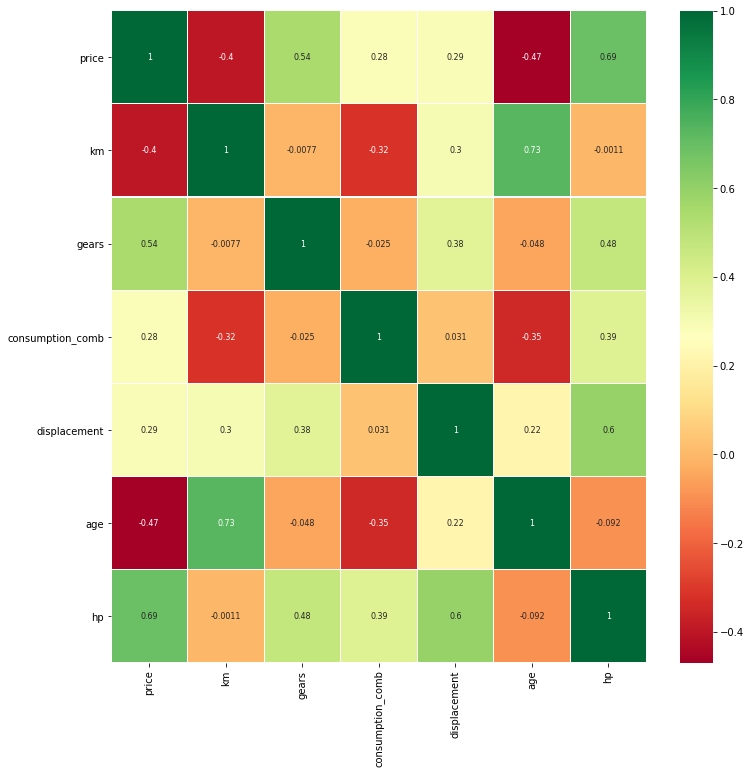

In [355]:
plt.figure(figsize = (12,12))
sns.heatmap(oto_corr.corr(), annot = True, cmap="RdYlGn", linewidths=0.2, annot_kws = {"size": 8});

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


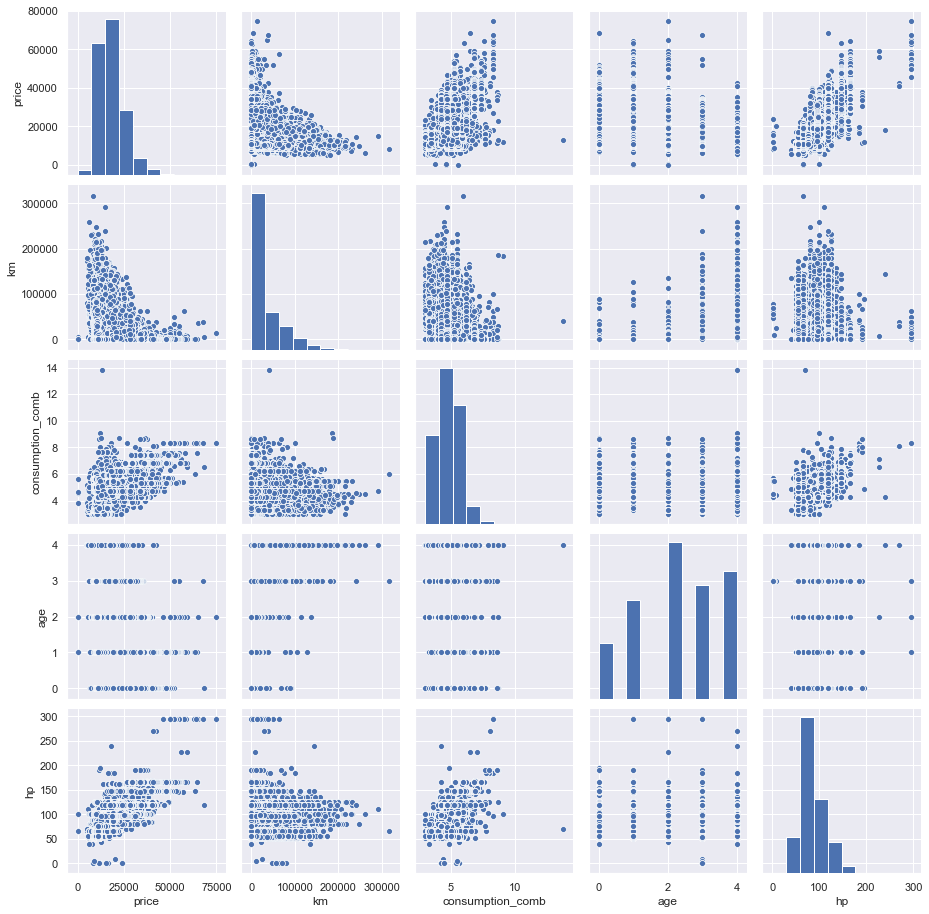

In [356]:
sns.set()

cols=["price", "km", "consumption_comb", "age", "hp"]

sns.pairplot(df[cols], size = 2.5)

plt.show()

In [357]:
df.price.describe()

count    15919.000000
mean     18019.896727
std       7386.169409
min         13.000000
25%      12850.000000
50%      16900.000000
75%      21900.000000
max      74600.000000
Name: price, dtype: float64

In [358]:
df.price.sort_values().head(50)

8594       13
8828      120
6066      255
8829      331
8827     4950
8825     4990
8826     5250
8824     5300
13770    5445
8823     5450
8822     5490
8820     5499
3235     5555
8821     5600
13763    5700
13762    5800
13760    5850
13759    5890
8818     5890
13761    5900
13757    5900
13758    5900
13756    5938
8819     5950
8602     5970
8600     5970
8601     5970
8597     5990
13755    6000
13754    6000
5712     6000
8599     6100
8598     6200
13753    6200
8596     6200
13752    6200
13751    6250
8816     6250
13749    6290
8807     6290
8806     6299
8805     6300
8803     6380
8802     6390
13750    6400
8801     6400
8799     6450
8804     6450
8800     6479
8796     6480
Name: price, dtype: int64

In [359]:
df[df["price"] <1000].index

Int64Index([6066, 8594, 8828, 8829], dtype='int64')

In [360]:
df.drop(index = df[df["price"] < 4950].index, axis = 0,inplace=True)

In [361]:
df.shape

(15915, 112)

In [362]:
df.head()

,make_model,body_type,price,km,prev_owner,hp,body color,paint type,upholstery,nr. of doors,nr. of seats,gearing type,displacement,gears,age,fuel_type,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,nu_vat
0,Audi A1,Sedans,15770,56013,2,66,Black,Metallic,cloth,5,5,Automatic,1422.0,6.0,4,Diesel,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1
1,Audi A1,Sedans,14500,80000,1,141,Red,Metallic,cloth,3,4,Automatic,1798.0,7.0,3,Benzine,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1
2,Audi A1,Sedans,14640,83450,1,85,Black,Metallic,cloth,4,4,Automatic,1598.0,6.0,4,Diesel,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1
3,Audi A1,Sedans,14500,73000,1,66,Brown,Metallic,cloth,3,4,Automatic,1422.0,6.0,4,Diesel,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0
4,Audi A1,Sedans,16790,16200,1,66,Black,Metallic,cloth,5,5,Automatic,1422.0,6.0,4,Diesel,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,0


In [363]:
df_cleaned = pd.get_dummies(df)

In [364]:
df_cleaned.shape

(15915, 151)

In [365]:
df_cleaned.head()

,price,km,hp,nr. of doors,nr. of seats,displacement,gears,age,consumption_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,ex_Sliding door,ex_Sport package,ex_Sport seats,ex_Sport suspension,ex_Touch screen,ex_Trailer hitch,ex_Tuned car,ex_Voice Control,ex_Winter tyres,ss_ABS,ss_Adaptive Cruise Control,ss_Adaptive headlights,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,nu_vat,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,prev_owner_0,prev_owner_1,prev_owner_2,prev_owner_3,prev_owner_4,body color_Beige,body color_Black,body color_Blue,body color_Bronze,body color_Brown,body color_Green,body color_Grey,body color_Orange,body color_Red,body color_Silver,body color_Violet,body color_White,body color_Yellow,paint type_Metallic,paint type_Perl effect,paint type_Uni/basic,upholstery_cloth,upholstery_full,upholstery_part,gearing type_Automatic,gearing type_Manual,gearing type_Semi-automatic,fuel_type_Benzine,fuel_type_Diesel,fuel_type_LPG/CNG
0,15770,56013,66,5,5,1422.0,6.0,4,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
1,14500,80000,141,3,4,1798.0,7.0,3,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
2,14640,83450,85,4,4,1598.0,6.0,4,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,14500,73000,66,3,4,1422.0,6.0,4,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0

In [366]:
df_cleaned.to_csv("scout_car_EDA.csv", index = False)